<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Splitting" data-toc-modified-id="Data-Splitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Splitting</a></span></li><li><span><a href="#Data-Scaling" data-toc-modified-id="Data-Scaling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Scaling</a></span></li><li><span><a href="#Finding-the-Best-Model" data-toc-modified-id="Finding-the-Best-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Finding the Best Model</a></span><ul class="toc-item"><li><span><a href="#Gradient-Boosting-Regression" data-toc-modified-id="Gradient-Boosting-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gradient Boosting Regression</a></span></li><li><span><a href="#Decision-Tree-Regression" data-toc-modified-id="Decision-Tree-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree Regression</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random Forest Regression</a></span></li><li><span><a href="#Support-Vector-Regression" data-toc-modified-id="Support-Vector-Regression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Support Vector Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#Sequential-Neural-Network(SNNs)" data-toc-modified-id="Sequential-Neural-Network(SNNs)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Sequential Neural Network(SNNs)</a></span></li></ul></li><li><span><a href="#Model-Evaluation-and-Selection" data-toc-modified-id="Model-Evaluation-and-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evaluation and Selection</a></span><ul class="toc-item"><li><span><a href="#Export-Model-to-Pickle-File" data-toc-modified-id="Export-Model-to-Pickle-File-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Export Model to Pickle File</a></span></li><li><span><a href="#Detailed-Best-Model-Performance" data-toc-modified-id="Detailed-Best-Model-Performance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Detailed Best Model Performance</a></span></li><li><span><a href="#Analyzing-Bias" data-toc-modified-id="Analyzing-Bias-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analyzing Bias</a></span></li><li><span><a href="#Prepare-functions-for-Flask-and-Heroku-Deployment" data-toc-modified-id="Prepare-functions-for-Flask-and-Heroku-Deployment-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Prepare functions for Flask and Heroku Deployment</a></span></li></ul></li></ul></div>

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd

In [2]:
# Bring in our stock data
ml_ready_stock_data = pd.read_csv('ml_ready_stock_data.csv', index_col='Date', parse_dates=True)
ml_ready_stock_data

,high,low,bollinger_std,stochastic_lowest_low,stochastic_highest_high,open_lag_2,next_day_close
Date,,,,,,,
2022-05-12 00:00:00-04:00,-0.130,-0.125,0.320393,-0.125,-0.007,-0.19,0.08
2022-05-13 00:00:00-04:00,0.090,0.085,0.327676,0.000,0.000,-0.01,-0.02
2022-05-16 00:00:00-04:00,0.078,0.080,0.340580,0.000,0.000,-0.15,0.03
2022-05-17 00:00:00-04:00,-0.018,0.041,0.338054,0.000,-0.080,-0.03,0.00
2022-05-18 00:00:00-04:00,0.010,0.019,0.327504,0.000,0.000,0.19,0.04
...,...,...,...,...,...,...,...
2024-03-21 00:00:00-04:00,0.030,0.030,0.273628,0.000,0.000,0.01,0.03
2024-03-22 00:00:00-04:00,0.010,0.070,0.266280,0.000,-0.376,0.01,-0.02
2024-03-25 00:00:00-04:00,0.000,-0.020,0.255682,0.000,-0.140,0.06,0.04


## Data Splitting

Split the data into a 80/20 ratio for training and testing sets, using Python's Scikit-learn library, ensuring to set the shuffle to false to avoid breaking the temporal elements of the data.

In [3]:
# Call train_test_split() with a test_size of 20%.

from sklearn.model_selection import train_test_split

# Separate features and target
x = ml_ready_stock_data.drop('next_day_close', axis=1)  
y = ml_ready_stock_data['next_day_close'] 

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=42)

#X_train: The features of the training set (80% of data)
#X_test: The features of the testing set (20% of data)
#y_train: The target labels of the training set (80% of data)
#y_test: The target labels of the testing set (20% of data)

## Data Scaling

Feature scaling will pre-process the stock data so that all the values fall within a similar range.

In [4]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler()
X_train_scaled = scaled_X.fit_transform(X_train)
X_test_scaled = scaled_X.fit_transform(X_test)

## Finding the Best Model

First, import the GridSearchCV library

In [5]:
# Use GridSearchCV to perfrom Hyperparameter tuning to find:-
# The best combination of hyperparameter values to achieve optimal performance

from sklearn.model_selection import GridSearchCV

A primary goal of using GridSearchCV is to sweep the hyperparameter space and tune parameters towards regularization, aiming to constrain model complexity and primarily prevent overfitting. This can significantly improve the model's ability to generalize to unseen data.

**Second, import library to compute performance metrics**

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Note: For each of the models, I will evaluate the model's performance on the scaled testing data set by invoking the predict() method and passing scaled features to it.

Next, I will begin working through each of my models;

- First, defining the parameters selected for each model

- Then running through Grid Search three times for each model, starting from Coarse-Grained to Refined and then Final.

- And lastly, getting the predictions and calculation of the metrics for each model.


The only exemption to this process is at the Sequential Neural Network (SNN), as I did the grid search within a function.


### Gradient Boosting Regression

In [7]:
#Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor

Parameters selected to use for cross-validation and tuning:

* `max_depth = <value>`
* `n_estimators = <value>`
* `learning_rate = <value>`
* `subsample = <value>`
* `loss = <value>`

In [8]:
# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----

#Parameter Grid
param_gbreg_coarse = {
    "max_depth": [1, 2, 3],
    "n_estimators": [1, 15, 50, 100, 200],
    "learning_rate": [0.005, 0.01, 0.04, 0.08, 0.16],
    "subsample": [0.05, 0.1, 0.5, 1.0],
    "loss": ['squared_error', 'absolute_error', 'huber', 'quantile']
}

#Grid Search (grid_search -> gs)
gs_gbreg_coarse = GridSearchCV(GradientBoostingRegressor(random_state=42), param_gbreg_coarse, verbose=1, cv=3)

gs_gbreg_coarse.fit(X_train_scaled, y_train)

best_params_gbreg_coarse = gs_gbreg_coarse.best_params_

print("The best parameters are:", best_params_gbreg_coarse)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
The best parameters are: {'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.1}


In [9]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

#Parameter Grid
param_gbreg_refined = {
    "max_depth": [1],
    "n_estimators": [50, 75, 100, 125, 150, 175, 200],
    "learning_rate": [0.005, 0.007, 0.009, 0.01, 0.02, 0.03, 0.04],
    "subsample": [0.05, 0.07, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5],
    "loss": ['huber']
}

#Grid Search (grid_search -> gs)
gs_gbreg_refined = GridSearchCV(GradientBoostingRegressor(random_state=42), param_gbreg_refined, verbose=1, cv=3)

gs_gbreg_refined.fit(X_train_scaled, y_train)

best_params_gbreg_refined = gs_gbreg_refined.best_params_

print("The best parameters are:", best_params_gbreg_refined)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits
The best parameters are: {'learning_rate': 0.009, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 100, 'subsample': 0.1}


In [10]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

#Parameter Grid
param_gbreg_final = {
    "max_depth": [1],
    "n_estimators": [75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125],
    "learning_rate": [0.007, 0.008, 0.009, 0.01],
    "subsample": [0.09, 0.1,0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2],
    "loss": ['huber']
}

#Grid Search (grid_search -> gs)
gs_gbreg_final = GridSearchCV(GradientBoostingRegressor(random_state=42), param_gbreg_final, verbose=1, cv=3)

gs_gbreg_final.fit(X_train_scaled, y_train)

best_params_gbreg_final = gs_gbreg_final.best_params_

print("The best parameters are:", best_params_gbreg_final)

Fitting 3 folds for each of 528 candidates, totalling 1584 fits
The best parameters are: {'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 105, 'subsample': 0.1}


**The Optimal Gradient Boosting Regressor Model**

In [11]:
#Instantiate the model
gbreg_final = GradientBoostingRegressor(**best_params_gbreg_final)

#Train the model/Fit the model on the training data
gbreg_final.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=1,
                          n_estimators=105, subsample=0.1)

In [12]:
# Model Prediction and calculate Metrics
predicted_y_gbreg = gbreg_final.predict(X_test_scaled)

# Mean Squared Error (MSE)
mse_gbreg = round(mean_squared_error(y_test, predicted_y_gbreg),4)

# Root Mean Squared Error (RMSE)
rmse_gbreg = round(np.sqrt(mean_squared_error(y_test, predicted_y_gbreg)),4)

# Mean Absolute Error (MAE)
mae_gbreg = round(mean_absolute_error(y_test, predicted_y_gbreg),4)

# R-squared (Coefficient of Determination)
r2_gbreg = round(r2_score(y_test, predicted_y_gbreg),4)


# Sharpe Ratio (Simplified)
ret_gbreg = predicted_y_gbreg # predicted return
risk_free_rate_gbreg = 0.01  # hypothesize risk-free rate
sharpe_ratio_gbreg = round((ret_gbreg.mean() - risk_free_rate_gbreg) / ret_gbreg.std(),4)

# Print Results for this iteration
print("RMSE:", rmse_gbreg)
print("MAE:", mae_gbreg)
print("Sharpe Ratio:", sharpe_ratio_gbreg)


RMSE: 0.1881
MAE: 0.1168
Sharpe Ratio: -3.3864


### Decision Tree Regression

In [13]:
#Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

Parameters selected to use for cross-validation and tuning:

* `criterion = <value>`
* `splitter = <value>`
* `max_depth = <value>`
* `max_features = <value>`
* `min_samples_split = <value>`


In [14]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

#Parameter Grid
param_dtreg_coarse = {
    "criterion": ['squared_error', 'friedman_mse','absolute_error'],
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5, 8, 16, 32],
    "max_features": ['auto', 'sqrt', 'log2'],
    "min_samples_split": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

#Grid Search (grid_search -> gs)
gs_dtreg_coarse = GridSearchCV(DecisionTreeRegressor(random_state=42), param_dtreg_coarse, verbose=1, cv=3)

gs_dtreg_coarse.fit(X_train_scaled, y_train)

best_params_dtreg_coarse = gs_dtreg_coarse.best_params_

print("The best parameters are:", best_params_dtreg_coarse)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
The best parameters are: {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 2, 'splitter': 'best'}


In [15]:
# -----
# Refined DecisionTreeRegressor GridSearch
# -----

#Parameter Grid
param_dtreg_refined = {
     "criterion": ['squared_error'],
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3],
    "max_features": ['sqrt'],
    "min_samples_split": [2, 3, 4,]
}

#Grid Search (grid_search -> gs)
gs_dtreg_refined = GridSearchCV(DecisionTreeRegressor(random_state=42), param_dtreg_refined, verbose=1, cv=3)

gs_dtreg_refined.fit(X_train, y_train)

best_params_dtreg_refined = gs_dtreg_refined.best_params_

print("The best parameters are:", best_params_dtreg_refined)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
The best parameters are: {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 2, 'splitter': 'best'}


In [16]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

#Parameter Grid
param_dtreg_final = {
   "criterion": ['squared_error'],
    "splitter": ["best"],
    "max_depth": [1],
    "max_features": ['sqrt'],
    "min_samples_split": [2]
}

#Grid Search (grid_search -> gs)
gs_dtreg_final = GridSearchCV(DecisionTreeRegressor(random_state=42), param_dtreg_final, verbose=1, cv=3)

gs_dtreg_final.fit(X_train, y_train)

best_params_dtreg_final = gs_dtreg_final.best_params_

print("The best parameters are:", best_params_dtreg_final)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
The best parameters are: {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 2, 'splitter': 'best'}


**The Optimal Decision Tree Regressor Model**

In [17]:
#Instantiate the model
dtreg_final = DecisionTreeRegressor(**best_params_dtreg_final)

#Train the model/Fit the model on the training data
dtreg_final.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, max_features='sqrt')

In [18]:
# Model Prediction and calculate Metrics
predicted_y_dtreg = dtreg_final.predict(X_test_scaled)

# Mean Squared Error (MSE)
mse_dtreg = round(mean_squared_error(y_test, predicted_y_dtreg),4)

# Root Mean Squared Error (RMSE)
rmse_dtreg = round(np.sqrt(mean_squared_error(y_test, predicted_y_dtreg)),4)

# Mean Absolute Error (MAE)
mae_dtreg = round(mean_absolute_error(y_test, predicted_y_dtreg),4)

# R-squared (Coefficient of Determination)
r2_dtreg = round(r2_score(y_test, predicted_y_dtreg),4)


# Sharpe Ratio (Simplified)
ret_dtreg = predicted_y_dtreg # predicted return
risk_free_rate_dtreg = 0.01  # hypothesize risk-free rate
sharpe_ratio_dtreg = round((ret_dtreg.mean() - risk_free_rate_dtreg) / ret_dtreg.std(),4)

# Print Results for this iteration
print("RMSE:", rmse_dtreg)
print("MAE:", mae_dtreg)
print("Sharpe Ratio:", sharpe_ratio_dtreg)

RMSE: 0.2306
MAE: 0.1489
Sharpe Ratio: -0.5386


C:\Users\onyab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Random Forest Regression

In [19]:
#Import necessary library
from sklearn.ensemble import RandomForestRegressor

Parameters selected to use for cross-validation and tuning:

* `criterion = <value>`
* `max_depth = <value>`
* `max_features = <value>`
* `n_estimators = <value>`
* `min_samples_split = <value>`


In [20]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

#Parameter Grid
param_rfreg_coarse = {
    "criterion": ['squared_error', 'absolute_error', 'friedman_mse'],
    "max_depth": [1, 2, 3, 4, 8, 16],
    "max_features": ['auto', 'sqrt', 'log2'],
    "n_estimators": [1, 5, 10, 50, 100],
    "min_samples_split": [2, 4, 6, 8, 10, 12]
}

#Grid Search (grid_search -> gs)
gs_rfreg_coarse = GridSearchCV(RandomForestRegressor(random_state=42), param_rfreg_coarse, verbose=1, cv=3)

gs_rfreg_coarse.fit(X_train_scaled, y_train)

best_params_rfreg_coarse = gs_rfreg_coarse.best_params_

print("The best parameters are:", best_params_rfreg_coarse)

Fitting 3 folds for each of 1620 candidates, totalling 4860 fits
The best parameters are: {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}


In [21]:
# -----
# Refined RandomForestRegressor GridSearch
# -----

#Parameter Grid
param_rfreg_refined = {
    "criterion": ['squared_error'],
    "max_depth": [1, 2, 3, 4],
    "max_features": ['sqrt'],
    "n_estimators": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    "min_samples_split": [2, 3, 4]
}

#Grid Search (grid_search -> gs)
gs_rfreg_refined = GridSearchCV(RandomForestRegressor(random_state=42), param_rfreg_refined, verbose=1, cv=3)

gs_rfreg_refined.fit(X_train, y_train)

best_params_rfreg_refined = gs_rfreg_refined.best_params_

print("The best parameters are:", best_params_rfreg_refined)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
The best parameters are: {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}


In [22]:
# -----
# Final RandomForestRegressor GridSearch
# -----

#Parameter Grid
param_rfreg_final = {
    "criterion": ['squared_error'],
    "max_depth": [1],
    "max_features": ['sqrt'],
    "n_estimators": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_split": [2]
}

#Grid Search (grid_search -> gs)
gs_rfreg_final = GridSearchCV(RandomForestRegressor(random_state=42), param_rfreg_final, verbose=1, cv=3)

gs_rfreg_final.fit(X_train, y_train)

best_params_rfreg_final = gs_rfreg_final.best_params_

print("The best parameters are:", best_params_rfreg_final)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
The best parameters are: {'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 11}


**The Optimal Random Forest Regressor Model**

In [23]:
#Instantiate the model
rfreg_final = RandomForestRegressor(**best_params_rfreg_final)

#Train the model/Fit the model on the training data
rfreg_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=1, max_features='sqrt', n_estimators=11)

In [24]:
# Model Prediction and calculate Metrics
predicted_y_rfreg = rfreg_final.predict(X_test_scaled)

# Mean Squared Error (MSE)
mse_rfreg = round(mean_squared_error(y_test, predicted_y_rfreg),4)

# Root Mean Squared Error (RMSE)
rmse_rfreg = round(np.sqrt(mean_squared_error(y_test, predicted_y_rfreg)),4)

# Mean Absolute Error (MAE)
mae_rfreg = round(mean_absolute_error(y_test, predicted_y_rfreg),4)

# R-squared (Coefficient of Determination)
r2_rfreg = round(r2_score(y_test, predicted_y_rfreg),4)


# Sharpe Ratio (Simplified)
ret_rfreg = predicted_y_rfreg # predicted return
risk_free_rate_rfreg = 0.01  # hypothesize risk-free rate
sharpe_ratio_rfreg = round((ret_rfreg.mean() - risk_free_rate_rfreg) / ret_rfreg.std(),4)

# Print Results for this iteration
print("RMSE:", rmse_rfreg)
print("MAE:", mae_rfreg)
print("Sharpe Ratio:", sharpe_ratio_rfreg)

RMSE: 0.1915
MAE: 0.1172
Sharpe Ratio: -0.4968


C:\Users\onyab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Support Vector Regression

In [25]:
#Import necessary library
from sklearn.svm import SVR

Parameters selected to use for cross-validation and tuning:

* `kernel = <value>`
* `gamma = <value>`
* `C = <value>`
* `epsilon = <value>`

In [26]:
# -----
# Coarse-Grained SVR (Support Vector Regression) GridSearch
# -----

#Parameter Grid
param_svr_coarse = {
    "kernel": ['rbf', 'linear'],
    "gamma": ['scale', 'auto'],
    "C": [0.01, 0.05, 0.1, 1, 10, 20],
    "epsilon": [0.01, 0.02, 0.04, 0.08]
}

#Grid Search (grid_search -> gs)
gs_svr_coarse = GridSearchCV(SVR(), param_svr_coarse, verbose=1, cv=3)

gs_svr_coarse.fit(X_train_scaled, y_train)

best_params_svr_coarse = gs_svr_coarse.best_params_

print("The best parameters are:", best_params_svr_coarse)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
The best parameters are: {'C': 10, 'epsilon': 0.02, 'gamma': 'scale', 'kernel': 'linear'}


In [27]:
# -----
# Refined-Grained SVR (Support Vector Regression) GridSearch
# -----

#Parameter Grid
param_svr_refined = {
    "kernel": ['linear'],
    "gamma": ['scale'],
    "C": [1, 5, 10, 15, 20],
    "epsilon": [0.01, 0.02, 0.03, 0.04]
}

#Grid Search (grid_search -> gs)
gs_svr_refined = GridSearchCV(SVR(), param_svr_refined, verbose=1, cv=3)

gs_svr_refined.fit(X_train_scaled, y_train)

best_params_svr_refined = gs_svr_refined.best_params_

print("The best parameters are:", best_params_svr_refined)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
The best parameters are: {'C': 10, 'epsilon': 0.02, 'gamma': 'scale', 'kernel': 'linear'}


In [28]:
# -----
# Final-Grained SVR (Support Vector Regression) GridSearch
# -----

#Parameter Grid
param_svr_final = {
    "kernel": ['rbf'],
    "gamma": ['auto'],
    "C": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "epsilon": [0.02]
}

#Grid Search (grid_search -> gs)
gs_svr_final = GridSearchCV(SVR(), param_svr_final, verbose=1, cv=3)

gs_svr_final.fit(X_train_scaled, y_train)

best_params_svr_final = gs_svr_final.best_params_

print("The best parameters are:", best_params_svr_final)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
The best parameters are: {'C': 5, 'epsilon': 0.02, 'gamma': 'auto', 'kernel': 'rbf'}


**The Optimal Support Vector Regression Model**

In [29]:
#Instantiate the model
svr_final = SVR(**best_params_svr_final)

#Train the model/Fit the model on the training data
svr_final.fit(X_train_scaled, y_train)

SVR(C=5, epsilon=0.02, gamma='auto')

In [30]:
# Model Prediction and calculate Metrics
predicted_y_svr = svr_final.predict(X_test_scaled)

# Mean Squared Error (MSE)
mse_svr = round(mean_squared_error(y_test, predicted_y_svr),4)

# Root Mean Squared Error (RMSE)
rmse_svr = round(np.sqrt(mean_squared_error(y_test, predicted_y_svr)),4)

# Mean Absolute Error (MAE)
mae_svr = round(mean_absolute_error(y_test, predicted_y_svr),4)

# R-squared (Coefficient of Determination)
r2_svr = round(r2_score(y_test, predicted_y_svr),4)


# Sharpe Ratio (Simplified)
ret_svr = predicted_y_svr # predicted return
risk_free_rate_svr = 0.01  # hypothesize risk-free rate
sharpe_ratio_svr = round((ret_svr.mean() - risk_free_rate_svr) / ret_svr.std(),4)

# Print Results for this iteration
print("RMSE:", rmse_svr)
print("MAE:", mae_svr)
print("Sharpe Ratio:", sharpe_ratio_svr)

RMSE: 0.181
MAE: 0.116
Sharpe Ratio: 0.0443


### Lasso Regression

In [31]:
#Import necessary library
from sklearn.linear_model import Lasso

Parameters selected to use for cross-validation and tuning:

* `alpha = <value>`
* `max_iter = <value>`

In [32]:
# -----
# Coarse-Grained Lasso Regression GridSearch
# -----

#Parameter Grid
param_lasso_coarse = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "max_iter": [10, 100, 200, 500] 
}

#Grid Search (grid_search -> gs)
gs_lasso_coarse = GridSearchCV(Lasso(random_state=42), param_lasso_coarse, verbose=1, cv=3)

gs_lasso_coarse.fit(X_train_scaled, y_train)

best_params_lasso_coarse = gs_lasso_coarse.best_params_

print("The best parameters are:", best_params_lasso_coarse)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
The best parameters are: {'alpha': 0.01, 'max_iter': 10}


In [33]:
# -----
# Refined-Grained Lasso Regression GridSearch
# -----

#Parameter Grid
param_lasso_refined = {
    "alpha": [0.0001, 0.001, 0.055, 0.01, 0.055, 0.1],
    "max_iter": [10, 25, 50, 75, 100] 
}

#Grid Search (grid_search -> gs)
gs_lasso_refined = GridSearchCV(Lasso(random_state=42), param_lasso_refined, verbose=1, cv=3)

gs_lasso_refined.fit(X_train, y_train)

best_params_lasso_refined = gs_lasso_refined.best_params_

print("The best parameters are:", best_params_lasso_refined)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
The best parameters are: {'alpha': 0.001, 'max_iter': 10}


In [34]:
# -----
# Final-Grained Lasso Regression GridSearch
# -----

#Parameter Grid
param_lasso_final = {
    "alpha": [0.0001, 0.0005, 0.001],
    "max_iter": [10] 
}

#Grid Search (grid_search -> gs)
gs_lasso_final = GridSearchCV(Lasso(random_state=42), param_lasso_final, verbose=1, cv=3)

gs_lasso_final.fit(X_train, y_train)

best_params_lasso_final = gs_lasso_final.best_params_

print("The best parameters are:", best_params_lasso_final)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
The best parameters are: {'alpha': 0.0005, 'max_iter': 10}


**The Optimal Lasso Regression Model**

In [35]:
#Instantiate the model
lasso_final = Lasso(**best_params_lasso_final)

#Train the model/Fit the model on the training data
lasso_final.fit(X_train, y_train)

Lasso(alpha=0.0005, max_iter=10)

In [36]:
# Model Prediction and calculate Metrics
predicted_y_lasso = lasso_final.predict(X_test_scaled)

# Mean Squared Error (MSE)
mse_lasso = round(mean_squared_error(y_test, predicted_y_lasso),4)

# Root Mean Squared Error (RMSE)
rmse_lasso = round(np.sqrt(mean_squared_error(y_test, predicted_y_lasso)),4)

# Mean Absolute Error (MAE)
mae_lasso = round(mean_absolute_error(y_test, predicted_y_lasso),4)

# R-squared (Coefficient of Determination)
r2_lasso = round(r2_score(y_test, predicted_y_lasso),4)


# Sharpe Ratio (Simplified)
ret_lasso = predicted_y_lasso # predicted return
risk_free_rate_lasso = 0.01  # hypothesize risk-free rate
sharpe_ratio_lasso = round((ret_lasso.mean() - risk_free_rate_lasso) / ret_lasso.std(),4)

# Print Results for this iteration
print("RMSE:", rmse_lasso)
print("MAE:", mae_lasso)
print("Sharpe Ratio:", sharpe_ratio_lasso)

RMSE: 0.1921
MAE: 0.1163
Sharpe Ratio: -0.1906


C:\Users\onyab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


### Sequential Neural Network(SNNs)

In [37]:
#Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor  # Bridge to Scikit-learn
#from scikeras.wrappers import KerasRegressor

In [38]:
def create_model(layers=1, nodes_per_layer=32, activation='relu', learning_rate=0.001, epochs=10, batch_size=32):
    
    model = Sequential()

    for i in range(layers):
        if i == 0:
            model.add(Dense(nodes_per_layer, activation=activation, input_shape=(X_train_scaled.shape[1],)))
        else:
            model.add(Dense(nodes_per_layer, activation=activation))

    model.add(Dense(1))  # Output layer for regression

    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

    # Train the model with validation data
    model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_scaled, y_test))

    # Return the trained model and the model predictions
    return model#, y_train_pred


In [39]:
snn_parameters = {
    'layers': [1, 2],
    'nodes_per_layer': [8, 16],
    'activation': ["relu"],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32]
}

In [40]:
snn_model = KerasRegressor(build_fn=create_model, verbose=1)  # Wrap your Keras model

snn_grid_search = GridSearchCV(estimator=snn_model, param_grid=snn_parameters, cv=3)

C:\Users\onyab\AppData\Local\Temp\ipykernel_35048\2330907025.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  snn_model = KerasRegressor(build_fn=create_model, verbose=1)  # Wrap your Keras model


In [41]:
grid_result = snn_grid_search.fit(X_train_scaled, y_train) 

# Get best parameters and the best model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

Epoch 1/10
24/24 [==============================] - 1s 7ms/step - loss: 0.1136 - val_loss: 0.1718
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0290 - val_loss: 0.2219
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.3222 - val_loss: 0.0395
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0431 - val_loss: 0.1529
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.0396
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0349
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0367
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0348
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0349
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0346
Epoch 1/10
16/16 [=

24/24 [==============================] - 0s 2ms/step - loss: 0.2012 - val_loss: 0.2660
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1796 - val_loss: 0.1106
Epoch 1/10
16/16 [==============================] - 0s 834us/step - loss: 0.0771
Epoch 2/10
16/16 [==============================] - 0s 835us/step - loss: 0.0092
Epoch 3/10
16/16 [==============================] - 0s 833us/step - loss: 0.0130
Epoch 4/10
16/16 [==============================] - 0s 873us/step - loss: 0.0232
Epoch 5/10
16/16 [==============================] - 0s 880us/step - loss: 0.0061
Epoch 6/10
16/16 [==============================] - 0s 891us/step - loss: 0.0060
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 8/10
16/16 [==============================] - 0s 932us/step - loss: 0.0057
Epoch 9/10
16/16 [==============================] - 0s 914us/step - loss: 0.0053
Epoch 10/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 1/1

16/16 [==============================] - 0s 810us/step - loss: 0.0069
Epoch 9/10
16/16 [==============================] - 0s 843us/step - loss: 0.0065
Epoch 10/10
8/8 [==============================] - 0s 904us/step - loss: 0.0058
Epoch 1/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0986 - val_loss: 0.0608
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0499
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0442
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0436
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0429
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0406
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0402
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - va

24/24 [==============================] - 0s 2ms/step - loss: 0.0697 - val_loss: 0.0735
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0645
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0473 - val_loss: 0.0581
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0410 - val_loss: 0.0532
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0336 - val_loss: 0.0497
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.0474
Epoch 1/10
16/16 [==============================] - 0s 848us/step - loss: 0.0306
Epoch 2/10
16/16 [==============================] - 0s 867us/step - loss: 0.0277
Epoch 3/10
16/16 [==============================] - 0s 822us/step - loss: 0.0240
Epoch 4/10
16/16 [==============================] - 0s 854us/step - loss: 0.0215
Epoch 5/10
16/16 [==============================] - 0s 836us/step - loss: 0.0198
Epoch 6/10
16/16 

16/16 [==============================] - 0s 844us/step - loss: 0.0328
Epoch 4/10
16/16 [==============================] - 0s 886us/step - loss: 0.0293
Epoch 5/10
16/16 [==============================] - 0s 854us/step - loss: 0.0265
Epoch 6/10
16/16 [==============================] - 0s 863us/step - loss: 0.0243
Epoch 7/10
16/16 [==============================] - 0s 828us/step - loss: 0.0225
Epoch 8/10
16/16 [==============================] - 0s 854us/step - loss: 0.0209
Epoch 9/10
16/16 [==============================] - 0s 775us/step - loss: 0.0197
Epoch 10/10
8/8 [==============================] - 0s 919us/step - loss: 0.0133
Epoch 1/10
24/24 [==============================] - 0s 5ms/step - loss: 0.4673 - val_loss: 0.3932
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4503 - val_loss: 0.3796
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.4342 - val_loss: 0.3668
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss

24/24 [==============================] - 0s 5ms/step - loss: 0.2704 - val_loss: 0.4429
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2600 - val_loss: 0.4286
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2496 - val_loss: 0.4165
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2402 - val_loss: 0.4043
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2313 - val_loss: 0.3920
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2222 - val_loss: 0.3814
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2143 - val_loss: 0.3700
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.2064 - val_loss: 0.3599
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1988 - val_loss: 0.3495
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1915 - val_loss: 0.3400
Epoch 1/10
16/16 [============

Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0362
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0351
Epoch 1/10
16/16 [==============================] - 0s 863us/step - loss: 0.0058
Epoch 2/10
16/16 [==============================] - 0s 912us/step - loss: 0.0057
Epoch 3/10
16/16 [==============================] - 0s 827us/step - loss: 0.0057
Epoch 4/10
16/16 [==============================] - 0s 824us/step - loss: 0.0059
Epoch 5/10
16/16 [==============================] - 0s 923us/step - loss: 0.0063
Epoch 6/10
16/16 [==============================] - 0s 831us/step - loss: 0.0059
Epoch 7/10
16/16 [==============================] - 0s 867us/step - loss: 0.0055
Epoch 8/10
16/16 [==============================] - 0s 862us/step - loss: 0.0056
Epoch 9/10
16/16 [==============================] - 0s 922us/step - loss: 0.0059
Epoch 10/10
8/8 [==============================] - 0s 952us/step - loss: 0

Epoch 8/10
16/16 [==============================] - 0s 963us/step - loss: 0.0042
Epoch 9/10
16/16 [==============================] - 0s 893us/step - loss: 0.0041
Epoch 10/10
8/8 [==============================] - 0s 900us/step - loss: 0.0126
Epoch 1/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0457 - val_loss: 0.0434
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0373
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0350
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0374
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0354
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0413
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0341
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 

24/24 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0383
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0372
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0399
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0375
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0375
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0370
Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2/10
16/16 [==============================] - 0s 934us/step - loss: 0.0044
Epoch 3/10
16/16 [==============================] - 0s 933us/step - loss: 0.0041
Epoch 4/10
16/16 [==============================] - 0s 867us/step - loss: 0.0040
Epoch 5/10
16/16 [==============================] - 0s 890us/step - loss: 0.0040
Epoch 6/10
16/16 [=

16/16 [==============================] - 0s 809us/step - loss: 0.0055
Epoch 4/10
16/16 [==============================] - 0s 909us/step - loss: 0.0054
Epoch 5/10
16/16 [==============================] - 0s 900us/step - loss: 0.0051
Epoch 6/10
16/16 [==============================] - 0s 834us/step - loss: 0.0050
Epoch 7/10
16/16 [==============================] - 0s 917us/step - loss: 0.0048
Epoch 8/10
16/16 [==============================] - 0s 847us/step - loss: 0.0048
Epoch 9/10
16/16 [==============================] - 0s 893us/step - loss: 0.0048
Epoch 10/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 1/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0479 - val_loss: 0.0755
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0281 - val_loss: 0.0719
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0618
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 

24/24 [==============================] - 1s 5ms/step - loss: 0.1114 - val_loss: 0.1193
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.1020 - val_loss: 0.1115
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0939 - val_loss: 0.1044
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0867 - val_loss: 0.0991
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0807 - val_loss: 0.0937
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0752 - val_loss: 0.0895
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0707 - val_loss: 0.0862
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0665 - val_loss: 0.0828
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0627 - val_loss: 0.0801
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0595 - val_loss: 0.0776
Epoch 1/10
16/16 [============

Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0958 - val_loss: 0.2058
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2000 - val_loss: 0.0971
Epoch 11/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1872 - val_loss: 0.2298
Epoch 12/20
24/24 [==============================] - 0s 2ms/step - loss: 1.1575 - val_loss: 0.1566
Epoch 13/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1334 - val_loss: 0.0965
Epoch 14/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0854 - val_loss: 0.0370
Epoch 15/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0148 - val_loss: 0.0352
Epoch 16/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0354
Epoch 17/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 18/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0352
Epoch 19/20

24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0416
Epoch 18/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0377
Epoch 19/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0363
Epoch 20/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0401
Epoch 1/20
16/16 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 2/20
16/16 [==============================] - 0s 834us/step - loss: 0.0064
Epoch 3/20
16/16 [==============================] - 0s 867us/step - loss: 0.0052
Epoch 4/20
16/16 [==============================] - 0s 867us/step - loss: 0.0056
Epoch 5/20
16/16 [==============================] - 0s 801us/step - loss: 0.0053
Epoch 6/20
16/16 [==============================] - 0s 823us/step - loss: 0.0055
Epoch 7/20
16/16 [==============================] - 0s 897us/step - loss: 0.0055
Epoch 8/20
16/16 [==============================] -

16/16 [==============================] - 0s 901us/step - loss: 0.0051
Epoch 7/20
16/16 [==============================] - 0s 800us/step - loss: 0.0050
Epoch 8/20
16/16 [==============================] - 0s 866us/step - loss: 0.0051
Epoch 9/20
16/16 [==============================] - 0s 800us/step - loss: 0.0052
Epoch 10/20
16/16 [==============================] - 0s 873us/step - loss: 0.0051
Epoch 11/20
16/16 [==============================] - 0s 835us/step - loss: 0.0049
Epoch 12/20
16/16 [==============================] - 0s 888us/step - loss: 0.0051
Epoch 13/20
16/16 [==============================] - 0s 800us/step - loss: 0.0051
Epoch 14/20
16/16 [==============================] - 0s 800us/step - loss: 0.0050
Epoch 15/20
16/16 [==============================] - 0s 800us/step - loss: 0.0050
Epoch 16/20
16/16 [==============================] - 0s 866us/step - loss: 0.0050
Epoch 17/20
16/16 [==============================] - 0s 800us/step - loss: 0.0049
Epoch 18/20
16/16 [============

16/16 [==============================] - 0s 849us/step - loss: 0.0035
Epoch 17/20
16/16 [==============================] - 0s 819us/step - loss: 0.0035
Epoch 18/20
16/16 [==============================] - 0s 923us/step - loss: 0.0037
Epoch 19/20
16/16 [==============================] - 0s 867us/step - loss: 0.0036
Epoch 20/20
8/8 [==============================] - 0s 967us/step - loss: 0.0167
Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 0.3670 - val_loss: 0.2846
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0871 - val_loss: 0.1622
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.1048
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0250 - val_loss: 0.0748
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0644
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0538
Epoch 7/20
24/24

Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0528
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0381
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.0533
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.0377
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0391
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0404
Epoch 11/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0373
Epoch 12/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0383
Epoch 13/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0388
Epoch 14/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0383
Epoch 15/20
24/

24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0413
Epoch 14/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0413
Epoch 15/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0399
Epoch 16/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0400
Epoch 17/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0410
Epoch 18/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0381
Epoch 19/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0424
Epoch 20/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0405
Epoch 1/20
16/16 [==============================] - 0s 963us/step - loss: 0.0063
Epoch 2/20
16/16 [==============================] - 0s 867us/step - loss: 0.0052
Epoch 3/20
16/16 [==============================] - 0s 835

Epoch 2/20
16/16 [==============================] - 0s 870us/step - loss: 0.0446
Epoch 3/20
16/16 [==============================] - 0s 868us/step - loss: 0.0427
Epoch 4/20
16/16 [==============================] - 0s 791us/step - loss: 0.0408
Epoch 5/20
16/16 [==============================] - 0s 878us/step - loss: 0.0391
Epoch 6/20
16/16 [==============================] - 0s 845us/step - loss: 0.0378
Epoch 7/20
16/16 [==============================] - 0s 859us/step - loss: 0.0364
Epoch 8/20
16/16 [==============================] - 0s 808us/step - loss: 0.0351
Epoch 9/20
16/16 [==============================] - 0s 915us/step - loss: 0.0340
Epoch 10/20
16/16 [==============================] - 0s 834us/step - loss: 0.0328
Epoch 11/20
16/16 [==============================] - 0s 852us/step - loss: 0.0318
Epoch 12/20
16/16 [==============================] - 0s 876us/step - loss: 0.0309
Epoch 13/20
16/16 [==============================] - 0s 873us/step - loss: 0.0300
Epoch 14/20
16/16 [=====

16/16 [==============================] - 0s 868us/step - loss: 0.0044
Epoch 13/20
16/16 [==============================] - 0s 800us/step - loss: 0.0043
Epoch 14/20
16/16 [==============================] - 0s 867us/step - loss: 0.0043
Epoch 15/20
16/16 [==============================] - 0s 867us/step - loss: 0.0042
Epoch 16/20
16/16 [==============================] - 0s 867us/step - loss: 0.0042
Epoch 17/20
16/16 [==============================] - 0s 867us/step - loss: 0.0042
Epoch 18/20
16/16 [==============================] - 0s 876us/step - loss: 0.0041
Epoch 19/20
16/16 [==============================] - 0s 938us/step - loss: 0.0041
Epoch 20/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 2.1026 - val_loss: 2.0319
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 1.6915 - val_loss: 1.6355
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 1.3613 - v

24/24 [==============================] - 0s 5ms/step - loss: 0.4122 - val_loss: 0.5512
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3956 - val_loss: 0.5336
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3807 - val_loss: 0.5173
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3661 - val_loss: 0.5021
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3526 - val_loss: 0.4874
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3395 - val_loss: 0.4737
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3270 - val_loss: 0.4609
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3155 - val_loss: 0.4482
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3046 - val_loss: 0.4359
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2944 - val_loss: 0.4246
Epoch 11/20
24/24 [===========

Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5548 - val_loss: 0.7004
Epoch 11/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5454 - val_loss: 0.6864
Epoch 12/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5356 - val_loss: 0.6734
Epoch 13/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5254 - val_loss: 0.6625
Epoch 14/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5164 - val_loss: 0.6512
Epoch 15/20
24/24 [==============================] - 0s 2ms/step - loss: 0.5079 - val_loss: 0.6396
Epoch 16/20
24/24 [==============================] - 0s 2ms/step - loss: 0.4996 - val_loss: 0.6275
Epoch 17/20
24/24 [==============================] - 0s 2ms/step - loss: 0.4910 - val_loss: 0.6166
Epoch 18/20
24/24 [==============================] - 0s 2ms/step - loss: 0.4827 - val_loss: 0.6059
Epoch 19/20
24/24 [==============================] - 0s 2ms/step - loss: 0.4744 - val_loss: 0.5970
Epoch 20/2

24/24 [==============================] - 0s 2ms/step - loss: 0.1828 - val_loss: 0.1535
Epoch 19/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1771 - val_loss: 0.1492
Epoch 20/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1718 - val_loss: 0.1439
Epoch 1/20
16/16 [==============================] - 0s 866us/step - loss: 0.1752
Epoch 2/20
16/16 [==============================] - 0s 800us/step - loss: 0.1717
Epoch 3/20
16/16 [==============================] - 0s 866us/step - loss: 0.1677
Epoch 4/20
16/16 [==============================] - 0s 889us/step - loss: 0.1642
Epoch 5/20
16/16 [==============================] - 0s 800us/step - loss: 0.1606
Epoch 6/20
16/16 [==============================] - 0s 834us/step - loss: 0.1571
Epoch 7/20
16/16 [==============================] - 0s 800us/step - loss: 0.1539
Epoch 8/20
16/16 [==============================] - 0s 867us/step - loss: 0.1505
Epoch 9/20
16/16 [==============================] - 0s 867us/step -

16/16 [==============================] - 0s 827us/step - loss: 0.0041
Epoch 9/20
16/16 [==============================] - 0s 861us/step - loss: 0.0038
Epoch 10/20
16/16 [==============================] - 0s 953us/step - loss: 0.0040
Epoch 11/20
16/16 [==============================] - 0s 867us/step - loss: 0.0044
Epoch 12/20
16/16 [==============================] - 0s 881us/step - loss: 0.0048
Epoch 13/20
16/16 [==============================] - 0s 904us/step - loss: 0.0053
Epoch 14/20
16/16 [==============================] - 0s 845us/step - loss: 0.0050
Epoch 15/20
16/16 [==============================] - 0s 945us/step - loss: 0.0040
Epoch 16/20
16/16 [==============================] - 0s 914us/step - loss: 0.0042
Epoch 17/20
16/16 [==============================] - 0s 966us/step - loss: 0.0039
Epoch 18/20
16/16 [==============================] - 0s 892us/step - loss: 0.0039
Epoch 19/20
16/16 [==============================] - 0s 918us/step - loss: 0.0040
Epoch 20/20
8/8 [============

16/16 [==============================] - 0s 866us/step - loss: 0.0057
Epoch 19/20
16/16 [==============================] - 0s 846us/step - loss: 0.0057
Epoch 20/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0040
Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 0.1666 - val_loss: 0.0352
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0344
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0354
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0352
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0355
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0354
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - 

24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0353
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0352
Epoch 11/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0353
Epoch 12/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0355
Epoch 13/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 14/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0352
Epoch 15/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0352
Epoch 16/20
24/24 [======

Epoch 15/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0363
Epoch 16/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0353
Epoch 17/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0350
Epoch 18/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0353
Epoch 19/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0349
Epoch 20/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0355
Epoch 1/20
16/16 [==============================] - 0s 944us/step - loss: 0.0046
Epoch 2/20
16/16 [==============================] - 0s 784us/step - loss: 0.0044
Epoch 3/20
16/16 [==============================] - 0s 890us/step - loss: 0.0046
Epoch 4/20
16/16 [==============================] - 0s 897us/step - loss: 0.0044
Epoch 5/20
16/16 [==============================] - 0s 834us/step - loss: 0.0046
E

16/16 [==============================] - 0s 867us/step - loss: 0.0034
Epoch 5/20
16/16 [==============================] - 0s 867us/step - loss: 0.0034
Epoch 6/20
16/16 [==============================] - 0s 867us/step - loss: 0.0033
Epoch 7/20
16/16 [==============================] - 0s 933us/step - loss: 0.0032
Epoch 8/20
16/16 [==============================] - 0s 867us/step - loss: 0.0033
Epoch 9/20
16/16 [==============================] - 0s 900us/step - loss: 0.0032
Epoch 10/20
16/16 [==============================] - 0s 867us/step - loss: 0.0031
Epoch 11/20
16/16 [==============================] - 0s 828us/step - loss: 0.0031
Epoch 12/20
16/16 [==============================] - 0s 933us/step - loss: 0.0031
Epoch 13/20
16/16 [==============================] - 0s 933us/step - loss: 0.0030
Epoch 14/20
16/16 [==============================] - 0s 933us/step - loss: 0.0030
Epoch 15/20
16/16 [==============================] - 0s 901us/step - loss: 0.0031
Epoch 16/20
16/16 [==============

16/16 [==============================] - 0s 846us/step - loss: 0.0065
Epoch 15/20
16/16 [==============================] - 0s 891us/step - loss: 0.0041
Epoch 16/20
16/16 [==============================] - 0s 924us/step - loss: 0.0040
Epoch 17/20
16/16 [==============================] - 0s 903us/step - loss: 0.0039
Epoch 18/20
16/16 [==============================] - 0s 858us/step - loss: 0.0038
Epoch 19/20
16/16 [==============================] - 0s 892us/step - loss: 0.0040
Epoch 20/20
8/8 [==============================] - 0s 842us/step - loss: 0.0040
Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 0.1580 - val_loss: 0.1698
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0846 - val_loss: 0.1143
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0959
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0425 - val_loss: 0.0798
Epoch 5/20
24/24 [==============================

24/24 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.0500
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0470
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0434
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0413
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.0388
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0377
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0126 - val_loss: 0.0364
Epoch 10/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0355
Epoch 11/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0347
Epoch 12/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0340
Epoch 13/20
24/24 [=========

Epoch 12/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0361
Epoch 13/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0351
Epoch 14/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0350
Epoch 15/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0348
Epoch 16/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0356
Epoch 17/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0341
Epoch 18/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0349
Epoch 19/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0347
Epoch 20/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0346
Epoch 1/20
16/16 [==============================] - 0s 951us/step - loss: 0.0049
Epoch 2/20
16/16 [==========

24/24 [==============================] - 0s 2ms/step - loss: 0.1846 - val_loss: 0.1840
Epoch 1/20
16/16 [==============================] - 0s 867us/step - loss: 0.1403
Epoch 2/20
16/16 [==============================] - 0s 868us/step - loss: 0.1356
Epoch 3/20
16/16 [==============================] - 0s 867us/step - loss: 0.1315
Epoch 4/20
16/16 [==============================] - 0s 867us/step - loss: 0.1271
Epoch 5/20
16/16 [==============================] - 0s 962us/step - loss: 0.1232
Epoch 6/20
16/16 [==============================] - 0s 933us/step - loss: 0.1196
Epoch 7/20
16/16 [==============================] - 0s 867us/step - loss: 0.1157
Epoch 8/20
16/16 [==============================] - 0s 867us/step - loss: 0.1123
Epoch 9/20
16/16 [==============================] - 0s 867us/step - loss: 0.1085
Epoch 10/20
16/16 [==============================] - 0s 867us/step - loss: 0.1058
Epoch 11/20
16/16 [==============================] - 0s 914us/step - loss: 0.1022
Epoch 12/20
16/16 [=

16/16 [==============================] - 0s 888us/step - loss: 0.2326
Epoch 11/20
16/16 [==============================] - 0s 913us/step - loss: 0.2285
Epoch 12/20
16/16 [==============================] - 0s 867us/step - loss: 0.2237
Epoch 13/20
16/16 [==============================] - 0s 916us/step - loss: 0.2199
Epoch 14/20
16/16 [==============================] - 0s 805us/step - loss: 0.2162
Epoch 15/20
16/16 [==============================] - 0s 824us/step - loss: 0.2128
Epoch 16/20
16/16 [==============================] - 0s 829us/step - loss: 0.2088
Epoch 17/20
16/16 [==============================] - 0s 864us/step - loss: 0.2061
Epoch 18/20
16/16 [==============================] - 0s 861us/step - loss: 0.2021
Epoch 19/20
16/16 [==============================] - 0s 867us/step - loss: 0.1992
Epoch 20/20
8/8 [==============================] - 0s 892us/step - loss: 0.0489
Epoch 1/20
24/24 [==============================] - 0s 5ms/step - loss: 0.1105 - val_loss: 0.1265
Epoch 2/20
24/

8/8 [==============================] - 0s 853us/step - loss: 0.0179
Epoch 1/20
24/24 [==============================] - 1s 5ms/step - loss: 0.1464 - val_loss: 0.1763
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1317 - val_loss: 0.1646
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1190 - val_loss: 0.1537
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1094 - val_loss: 0.1428
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0989 - val_loss: 0.1362
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0923 - val_loss: 0.1276
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0842 - val_loss: 0.1230
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0787 - val_loss: 0.1159
Epoch 9/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0729 - val_loss: 0.1111
Epoch 10/20
24/24 [==============================]

16/16 [==============================] - 0s 767us/step - loss: 0.0049
Epoch 19/30
16/16 [==============================] - 0s 814us/step - loss: 0.0050
Epoch 20/30
16/16 [==============================] - 0s 854us/step - loss: 0.0038
Epoch 21/30
16/16 [==============================] - 0s 800us/step - loss: 0.0038
Epoch 22/30
16/16 [==============================] - 0s 841us/step - loss: 0.0038
Epoch 23/30
16/16 [==============================] - 0s 867us/step - loss: 0.0042
Epoch 24/30
16/16 [==============================] - 0s 835us/step - loss: 0.0048
Epoch 25/30
16/16 [==============================] - 0s 800us/step - loss: 0.0042
Epoch 26/30
16/16 [==============================] - 0s 799us/step - loss: 0.0038
Epoch 27/30
16/16 [==============================] - 0s 851us/step - loss: 0.0037
Epoch 28/30
16/16 [==============================] - 0s 800us/step - loss: 0.0037
Epoch 29/30
16/16 [==============================] - 0s 800us/step - loss: 0.0038
Epoch 30/30
8/8 [===========

24/24 [==============================] - 0s 2ms/step - loss: 0.3066 - val_loss: 0.2932
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2607 - val_loss: 0.0742
Epoch 19/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2966 - val_loss: 0.2447
Epoch 20/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2462 - val_loss: 0.7478
Epoch 21/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2671 - val_loss: 0.2354
Epoch 22/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2154 - val_loss: 0.0810
Epoch 23/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3370 - val_loss: 1.0789
Epoch 24/30
24/24 [==============================] - 0s 2ms/step - loss: 0.9314 - val_loss: 0.1210
Epoch 25/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0437
Epoch 26/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0392
Epoch 27/30
24/24 [===

16/16 [==============================] - 0s 884us/step - loss: 0.0038
Epoch 18/30
16/16 [==============================] - 0s 860us/step - loss: 0.0039
Epoch 19/30
16/16 [==============================] - 0s 845us/step - loss: 0.0039
Epoch 20/30
16/16 [==============================] - 0s 822us/step - loss: 0.0039
Epoch 21/30
16/16 [==============================] - 0s 879us/step - loss: 0.0038
Epoch 22/30
16/16 [==============================] - 0s 854us/step - loss: 0.0038
Epoch 23/30
16/16 [==============================] - 0s 861us/step - loss: 0.0038
Epoch 24/30
16/16 [==============================] - 0s 932us/step - loss: 0.0040
Epoch 25/30
16/16 [==============================] - 0s 895us/step - loss: 0.0038
Epoch 26/30
16/16 [==============================] - 0s 880us/step - loss: 0.0040
Epoch 27/30
16/16 [==============================] - 0s 799us/step - loss: 0.0037
Epoch 28/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 29/30
16/16 [===========

24/24 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0449
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0453
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0438
Epoch 19/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0452
Epoch 20/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0438
Epoch 21/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0441
Epoch 22/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0442
Epoch 23/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0446
Epoch 24/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0445
Epoch 25/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0450
Epoch 26/30
24/24 [===

16/16 [==============================] - 0s 800us/step - loss: 0.0035
Epoch 17/30
16/16 [==============================] - 0s 867us/step - loss: 0.0033
Epoch 18/30
16/16 [==============================] - 0s 800us/step - loss: 0.0032
Epoch 19/30
16/16 [==============================] - 0s 860us/step - loss: 0.0033
Epoch 20/30
16/16 [==============================] - 0s 867us/step - loss: 0.0033
Epoch 21/30
16/16 [==============================] - 0s 867us/step - loss: 0.0033
Epoch 22/30
16/16 [==============================] - 0s 876us/step - loss: 0.0035
Epoch 23/30
16/16 [==============================] - 0s 867us/step - loss: 0.0036
Epoch 24/30
16/16 [==============================] - 0s 832us/step - loss: 0.0035
Epoch 25/30
16/16 [==============================] - 0s 901us/step - loss: 0.0035
Epoch 26/30
16/16 [==============================] - 0s 867us/step - loss: 0.0034
Epoch 27/30
16/16 [==============================] - 0s 834us/step - loss: 0.0033
Epoch 28/30
16/16 [=========

24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0409
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0408
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0401
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0394
Epoch 19/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0392
Epoch 20/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0394
Epoch 21/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0383
Epoch 22/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0387
Epoch 23/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0389
Epoch 24/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0393
Epoch 25/30
24/24 [===

16/16 [==============================] - 0s 917us/step - loss: 0.0036
Epoch 16/30
16/16 [==============================] - 0s 867us/step - loss: 0.0035
Epoch 17/30
16/16 [==============================] - 0s 804us/step - loss: 0.0035
Epoch 18/30
16/16 [==============================] - 0s 814us/step - loss: 0.0036
Epoch 19/30
16/16 [==============================] - 0s 867us/step - loss: 0.0035
Epoch 20/30
16/16 [==============================] - 0s 800us/step - loss: 0.0039
Epoch 21/30
16/16 [==============================] - 0s 829us/step - loss: 0.0034
Epoch 22/30
16/16 [==============================] - 0s 867us/step - loss: 0.0034
Epoch 23/30
16/16 [==============================] - 0s 934us/step - loss: 0.0034
Epoch 24/30
16/16 [==============================] - 0s 838us/step - loss: 0.0034
Epoch 25/30
16/16 [==============================] - 0s 867us/step - loss: 0.0033
Epoch 26/30
16/16 [==============================] - 0s 867us/step - loss: 0.0033
Epoch 27/30
16/16 [=========

24/24 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0428
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0391
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0345
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0334
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0371
Epoch 19/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0361
Epoch 20/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0366
Epoch 21/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0361
Epoch 22/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0354
Epoch 23/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0349
Epoch 24/30
24/24 [===

16/16 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 14/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 15/30
16/16 [==============================] - 0s 933us/step - loss: 0.0141
Epoch 16/30
16/16 [==============================] - 0s 934us/step - loss: 0.0138
Epoch 17/30
16/16 [==============================] - 0s 933us/step - loss: 0.0135
Epoch 18/30
16/16 [==============================] - 0s 933us/step - loss: 0.0133
Epoch 19/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 20/30
16/16 [==============================] - 0s 830us/step - loss: 0.0128
Epoch 21/30
16/16 [==============================] - 0s 1000us/step - loss: 0.0126
Epoch 22/30
16/16 [==============================] - 0s 898us/step - loss: 0.0123
Epoch 23/30
16/16 [==============================] - 0s 906us/step - loss: 0.0121
Epoch 24/30
16/16 [==============================] - 0s 916us/step - loss: 0.0120
Epoch 25/30
16/16 [==============

24/24 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0458
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0452
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0440
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0441
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0432
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0428
Epoch 19/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0423
Epoch 20/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0423
Epoch 21/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0416
Epoch 22/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0418
Epoch 23/30
24/24 [===

16/16 [==============================] - 0s 800us/step - loss: 0.0062
Epoch 13/30
16/16 [==============================] - 0s 866us/step - loss: 0.0061
Epoch 14/30
16/16 [==============================] - 0s 800us/step - loss: 0.0060
Epoch 15/30
16/16 [==============================] - 0s 874us/step - loss: 0.0060
Epoch 16/30
16/16 [==============================] - 0s 913us/step - loss: 0.0059
Epoch 17/30
16/16 [==============================] - 0s 836us/step - loss: 0.0058
Epoch 18/30
16/16 [==============================] - 0s 800us/step - loss: 0.0057
Epoch 19/30
16/16 [==============================] - 0s 867us/step - loss: 0.0057
Epoch 20/30
16/16 [==============================] - 0s 867us/step - loss: 0.0056
Epoch 21/30
16/16 [==============================] - 0s 851us/step - loss: 0.0056
Epoch 22/30
16/16 [==============================] - 0s 901us/step - loss: 0.0055
Epoch 23/30
16/16 [==============================] - 0s 814us/step - loss: 0.0054
Epoch 24/30
16/16 [=========

24/24 [==============================] - 0s 2ms/step - loss: 0.0339 - val_loss: 0.0586
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.0573
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0264 - val_loss: 0.0561
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0543
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0531
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0526
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0517
Epoch 19/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0503
Epoch 20/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0497
Epoch 21/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0489
Epoch 22/30
24/24 [===

16/16 [==============================] - 0s 827us/step - loss: 0.3651
Epoch 12/30
16/16 [==============================] - 0s 862us/step - loss: 0.3612
Epoch 13/30
16/16 [==============================] - 0s 836us/step - loss: 0.3581
Epoch 14/30
16/16 [==============================] - 0s 823us/step - loss: 0.3547
Epoch 15/30
16/16 [==============================] - 0s 829us/step - loss: 0.3513
Epoch 16/30
16/16 [==============================] - 0s 851us/step - loss: 0.3486
Epoch 17/30
16/16 [==============================] - 0s 890us/step - loss: 0.3448
Epoch 18/30
16/16 [==============================] - 0s 877us/step - loss: 0.3418
Epoch 19/30
16/16 [==============================] - 0s 830us/step - loss: 0.3382
Epoch 20/30
16/16 [==============================] - 0s 880us/step - loss: 0.3352
Epoch 21/30
16/16 [==============================] - 0s 833us/step - loss: 0.3318
Epoch 22/30
16/16 [==============================] - 0s 869us/step - loss: 0.3290
Epoch 23/30
16/16 [=========

24/24 [==============================] - 0s 2ms/step - loss: 1.3344 - val_loss: 1.2663
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 1.3077 - val_loss: 1.2408
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 1.2813 - val_loss: 1.2138
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 1.2573 - val_loss: 1.1850
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 1.2297 - val_loss: 1.1629
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 1.2063 - val_loss: 1.1415
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 1.1845 - val_loss: 1.1189
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 1.1614 - val_loss: 1.0976
Epoch 19/30
24/24 [==============================] - 0s 2ms/step - loss: 1.1408 - val_loss: 1.0761
Epoch 20/30
24/24 [==============================] - 0s 2ms/step - loss: 1.1185 - val_loss: 1.0568
Epoch 21/30
24/24 [===

16/16 [==============================] - 0s 872us/step - loss: 0.1006
Epoch 11/30
16/16 [==============================] - 0s 867us/step - loss: 0.0991
Epoch 12/30
16/16 [==============================] - 0s 800us/step - loss: 0.0977
Epoch 13/30
16/16 [==============================] - 0s 863us/step - loss: 0.0962
Epoch 14/30
16/16 [==============================] - 0s 834us/step - loss: 0.0948
Epoch 15/30
16/16 [==============================] - 0s 800us/step - loss: 0.0934
Epoch 16/30
16/16 [==============================] - 0s 867us/step - loss: 0.0921
Epoch 17/30
16/16 [==============================] - 0s 866us/step - loss: 0.0906
Epoch 18/30
16/16 [==============================] - 0s 867us/step - loss: 0.0893
Epoch 19/30
16/16 [==============================] - 0s 868us/step - loss: 0.0880
Epoch 20/30
16/16 [==============================] - 0s 901us/step - loss: 0.0867
Epoch 21/30
16/16 [==============================] - 0s 800us/step - loss: 0.0855
Epoch 22/30
16/16 [=========

24/24 [==============================] - 0s 2ms/step - loss: 0.4636 - val_loss: 0.4323
Epoch 11/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4477 - val_loss: 0.4181
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4327 - val_loss: 0.4047
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4172 - val_loss: 0.3906
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4038 - val_loss: 0.3772
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3905 - val_loss: 0.3651
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3777 - val_loss: 0.3541
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3662 - val_loss: 0.3417
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3544 - val_loss: 0.3309
Epoch 19/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3433 - val_loss: 0.3208
Epoch 20/30
24/24 [===

Epoch 9/30
16/16 [==============================] - 0s 800us/step - loss: 0.0039
Epoch 10/30
16/16 [==============================] - 0s 941us/step - loss: 0.0045
Epoch 11/30
16/16 [==============================] - 0s 800us/step - loss: 0.0041
Epoch 12/30
16/16 [==============================] - 0s 800us/step - loss: 0.0043
Epoch 13/30
16/16 [==============================] - 0s 828us/step - loss: 0.0044
Epoch 14/30
16/16 [==============================] - 0s 933us/step - loss: 0.0042
Epoch 15/30
16/16 [==============================] - 0s 868us/step - loss: 0.0043
Epoch 16/30
16/16 [==============================] - 0s 834us/step - loss: 0.0044
Epoch 17/30
16/16 [==============================] - 0s 867us/step - loss: 0.0042
Epoch 18/30
16/16 [==============================] - 0s 867us/step - loss: 0.0042
Epoch 19/30
16/16 [==============================] - 0s 867us/step - loss: 0.0041
Epoch 20/30
16/16 [==============================] - 0s 894us/step - loss: 0.0039
Epoch 21/30
16/16

24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0349
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0349
Epoch 11/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0347
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0347
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0347
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0347
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0348
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0347
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0352
Epoch 18/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0347
Epoch 19/30
24/24 [===

16/16 [==============================] - 0s 829us/step - loss: 0.0046
Epoch 8/30
16/16 [==============================] - 0s 823us/step - loss: 0.0043
Epoch 9/30
16/16 [==============================] - 0s 800us/step - loss: 0.0040
Epoch 10/30
16/16 [==============================] - 0s 980us/step - loss: 0.0040
Epoch 11/30
16/16 [==============================] - 0s 829us/step - loss: 0.0047
Epoch 12/30
16/16 [==============================] - 0s 888us/step - loss: 0.0040
Epoch 13/30
16/16 [==============================] - 0s 952us/step - loss: 0.0040
Epoch 14/30
16/16 [==============================] - 0s 828us/step - loss: 0.0039
Epoch 15/30
16/16 [==============================] - 0s 815us/step - loss: 0.0041
Epoch 16/30
16/16 [==============================] - 0s 875us/step - loss: 0.0038
Epoch 17/30
16/16 [==============================] - 0s 877us/step - loss: 0.0039
Epoch 18/30
16/16 [==============================] - 0s 882us/step - loss: 0.0040
Epoch 19/30
16/16 [===========

24/24 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0351
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0355
Epoch 11/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0366
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0357
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0352
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0351
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0353
Epoch 17/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0356
Epoch 18/30
24/24 [====

16/16 [==============================] - 0s 933us/step - loss: 0.0031
Epoch 7/30
16/16 [==============================] - 0s 867us/step - loss: 0.0031
Epoch 8/30
16/16 [==============================] - 0s 832us/step - loss: 0.0031
Epoch 9/30
16/16 [==============================] - 0s 867us/step - loss: 0.0030
Epoch 10/30
16/16 [==============================] - 0s 895us/step - loss: 0.0030
Epoch 11/30
16/16 [==============================] - 0s 867us/step - loss: 0.0029
Epoch 12/30
16/16 [==============================] - 0s 881us/step - loss: 0.0029
Epoch 13/30
16/16 [==============================] - 0s 867us/step - loss: 0.0029
Epoch 14/30
16/16 [==============================] - 0s 826us/step - loss: 0.0028
Epoch 15/30
16/16 [==============================] - 0s 876us/step - loss: 0.0029
Epoch 16/30
16/16 [==============================] - 0s 867us/step - loss: 0.0028
Epoch 17/30
16/16 [==============================] - 0s 866us/step - loss: 0.0028
Epoch 18/30
16/16 [============

24/24 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0424
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0415
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0386
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0450
Epoch 11/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0370
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0387
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0404
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0377
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0375
Epoch 16/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0389
Epoch 17/30
24/24 [=====

16/16 [==============================] - 0s 979us/step - loss: 0.0028
Epoch 6/30
16/16 [==============================] - 0s 967us/step - loss: 0.0029
Epoch 7/30
16/16 [==============================] - 0s 904us/step - loss: 0.0029
Epoch 8/30
16/16 [==============================] - 0s 871us/step - loss: 0.0028
Epoch 9/30
16/16 [==============================] - 0s 907us/step - loss: 0.0029
Epoch 10/30
16/16 [==============================] - 0s 937us/step - loss: 0.0028
Epoch 11/30
16/16 [==============================] - 0s 847us/step - loss: 0.0028
Epoch 12/30
16/16 [==============================] - 0s 948us/step - loss: 0.0028
Epoch 13/30
16/16 [==============================] - 0s 907us/step - loss: 0.0027
Epoch 14/30
16/16 [==============================] - 0s 862us/step - loss: 0.0028
Epoch 15/30
16/16 [==============================] - 0s 901us/step - loss: 0.0027
Epoch 16/30
16/16 [==============================] - 0s 907us/step - loss: 0.0026
Epoch 17/30
16/16 [=============

24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0382
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0378
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0388
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0369
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0362
Epoch 11/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0364
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0350
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0381
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0374
Epoch 15/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0361
Epoch 16/30
24/24 [======

16/16 [==============================] - 0s 952us/step - loss: 0.0053
Epoch 5/30
16/16 [==============================] - 0s 950us/step - loss: 0.0053
Epoch 6/30
16/16 [==============================] - 0s 854us/step - loss: 0.0052
Epoch 7/30
16/16 [==============================] - 0s 967us/step - loss: 0.0051
Epoch 8/30
16/16 [==============================] - 0s 855us/step - loss: 0.0051
Epoch 9/30
16/16 [==============================] - 0s 933us/step - loss: 0.0050
Epoch 10/30
16/16 [==============================] - 0s 921us/step - loss: 0.0050
Epoch 11/30
16/16 [==============================] - 0s 834us/step - loss: 0.0050
Epoch 12/30
16/16 [==============================] - 0s 926us/step - loss: 0.0049
Epoch 13/30
16/16 [==============================] - 0s 843us/step - loss: 0.0049
Epoch 14/30
16/16 [==============================] - 0s 833us/step - loss: 0.0048
Epoch 15/30
16/16 [==============================] - 0s 867us/step - loss: 0.0048
Epoch 16/30
16/16 [==============

24/24 [==============================] - 0s 2ms/step - loss: 0.3111 - val_loss: 0.2599
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2681 - val_loss: 0.2306
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2326 - val_loss: 0.2111
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2088 - val_loss: 0.1887
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1862 - val_loss: 0.1667
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1642 - val_loss: 0.1493
Epoch 11/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1463 - val_loss: 0.1378
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1318 - val_loss: 0.1181
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1131 - val_loss: 0.1072
Epoch 14/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1007 - val_loss: 0.0982
Epoch 15/30
24/24 [=======

Epoch 3/30
16/16 [==============================] - 0s 953us/step - loss: 0.0032
Epoch 4/30
16/16 [==============================] - 0s 867us/step - loss: 0.0031
Epoch 5/30
16/16 [==============================] - 0s 946us/step - loss: 0.0031
Epoch 6/30
16/16 [==============================] - 0s 867us/step - loss: 0.0031
Epoch 7/30
16/16 [==============================] - 0s 901us/step - loss: 0.0030
Epoch 8/30
16/16 [==============================] - 0s 867us/step - loss: 0.0030
Epoch 9/30
16/16 [==============================] - 0s 800us/step - loss: 0.0030
Epoch 10/30
16/16 [==============================] - 0s 934us/step - loss: 0.0029
Epoch 11/30
16/16 [==============================] - 0s 901us/step - loss: 0.0029
Epoch 12/30
16/16 [==============================] - 0s 867us/step - loss: 0.0029
Epoch 13/30
16/16 [==============================] - 0s 899us/step - loss: 0.0028
Epoch 14/30
16/16 [==============================] - 0s 867us/step - loss: 0.0028
Epoch 15/30
16/16 [====

24/24 [==============================] - 0s 2ms/step - loss: 0.0799 - val_loss: 0.1285
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0615 - val_loss: 0.1162
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.1012
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0412 - val_loss: 0.0926
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.0845
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0293 - val_loss: 0.0777
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0250 - val_loss: 0.0729
Epoch 11/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.0688
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0654
Epoch 13/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0626
Epoch 14/30
24/24 [========

16/16 [==============================] - 0s 940us/step - loss: 0.0503
Epoch 2/30
16/16 [==============================] - 0s 846us/step - loss: 0.0498
Epoch 3/30
16/16 [==============================] - 0s 869us/step - loss: 0.0490
Epoch 4/30
16/16 [==============================] - 0s 952us/step - loss: 0.0484
Epoch 5/30
16/16 [==============================] - 0s 867us/step - loss: 0.0477
Epoch 6/30
16/16 [==============================] - 0s 919us/step - loss: 0.0471
Epoch 7/30
16/16 [==============================] - 0s 824us/step - loss: 0.0464
Epoch 8/30
16/16 [==============================] - 0s 901us/step - loss: 0.0459
Epoch 9/30
16/16 [==============================] - 0s 800us/step - loss: 0.0452
Epoch 10/30
16/16 [==============================] - 0s 881us/step - loss: 0.0447
Epoch 11/30
16/16 [==============================] - 0s 867us/step - loss: 0.0441
Epoch 12/30
16/16 [==============================] - 0s 935us/step - loss: 0.0435
Epoch 13/30
16/16 [=================

24/24 [==============================] - 0s 2ms/step - loss: 0.3263 - val_loss: 0.3817
Epoch 4/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3140 - val_loss: 0.3662
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2997 - val_loss: 0.3535
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2873 - val_loss: 0.3407
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2758 - val_loss: 0.3275
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2644 - val_loss: 0.3154
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2531 - val_loss: 0.3050
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2431 - val_loss: 0.2942
Epoch 11/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2343 - val_loss: 0.2827
Epoch 12/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2243 - val_loss: 0.2731
Epoch 13/30
24/24 [=========

24/24 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0409
Epoch 1/30
16/16 [==============================] - 0s 896us/step - loss: 0.0086
Epoch 2/30
16/16 [==============================] - 0s 800us/step - loss: 0.0085
Epoch 3/30
16/16 [==============================] - 0s 931us/step - loss: 0.0083
Epoch 4/30
16/16 [==============================] - 0s 939us/step - loss: 0.0082
Epoch 5/30
16/16 [==============================] - 0s 876us/step - loss: 0.0080
Epoch 6/30
16/16 [==============================] - 0s 877us/step - loss: 0.0079
Epoch 7/30
16/16 [==============================] - 0s 867us/step - loss: 0.0078
Epoch 8/30
16/16 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 9/30
16/16 [==============================] - 0s 962us/step - loss: 0.0075
Epoch 10/30
16/16 [==============================] - 0s 867us/step - loss: 0.0074
Epoch 11/30
16/16 [==============================] - 0s 933us/step - loss: 0.0073
Epoch 12/30
16/16 [===

24/24 [==============================] - 0s 3ms/step - loss: 0.2065 - val_loss: 0.2689
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1812 - val_loss: 0.2385
Epoch 4/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1593 - val_loss: 0.2150
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1422 - val_loss: 0.1943
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1278 - val_loss: 0.1775
Epoch 7/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1158 - val_loss: 0.1636
Epoch 8/30
24/24 [==============================] - 0s 2ms/step - loss: 0.1065 - val_loss: 0.1518
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0988 - val_loss: 0.1427
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0923 - val_loss: 0.1358
Epoch 11/30
24/24 [==============================] - 0s 2ms/step - loss: 0.0873 - val_loss: 0.1294
Epoch 12/30
24/24 [==========

8/8 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 2/10
8/8 [==============================] - 0s 943us/step - loss: 0.0054
Epoch 3/10
8/8 [==============================] - 0s 823us/step - loss: 0.0052
Epoch 4/10
8/8 [==============================] - 0s 980us/step - loss: 0.0052
Epoch 5/10
8/8 [==============================] - 0s 967us/step - loss: 0.0051
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 7/10
8/8 [==============================] - 0s 858us/step - loss: 0.0052
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 9/10
8/8 [==============================] - 0s 987us/step - loss: 0.0051
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 1/10
12/12 [==============================] - 0s 9ms/step - loss: 0.1481 - val_loss: 0.1577
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0412 - val_loss: 0.0790
Epoch 3/10
12/12 [==============

12/12 [==============================] - 0s 9ms/step - loss: 0.7116 - val_loss: 0.4434
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2787 - val_loss: 0.1883
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1443 - val_loss: 0.1093
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0859 - val_loss: 0.0784
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.0664
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.0551
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.0489
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.0451
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0435
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0125 - val_loss: 0.0424
Epoch 1/10
8/8 [==============

Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0387
Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 3/10
8/8 [==============================] - 0s 945us/step - loss: 0.0068
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 7/10
8/8 [==============================] - 0s 926us/step - loss: 0.0062
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 9/10
8/8 [==============================] - 0s 920us/step - loss: 0.0061
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 1/10
12/12 [==============================] - 1s 9ms/step - loss: 0.1293 - val_loss: 0.1426
Epoch 2/10
12/12 [========

4/4 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 1/10
12/12 [==============================] - 0s 9ms/step - loss: 0.3387 - val_loss: 0.2867
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2610 - val_loss: 0.2320
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2104 - val_loss: 0.1875
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1702 - val_loss: 0.1562
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1381 - val_loss: 0.1336
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1142 - val_loss: 0.1174
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0963 - val_loss: 0.1032
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0822 - val_loss: 0.0914
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0697 - val_loss: 0.0836
Epoch 10/10
12/12 [==============================] -

12/12 [==============================] - 0s 3ms/step - loss: 0.2917 - val_loss: 0.4130
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2865 - val_loss: 0.4079
Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 0.3177
Epoch 2/10
8/8 [==============================] - 0s 768us/step - loss: 0.3140
Epoch 3/10
8/8 [==============================] - 0s 913us/step - loss: 0.3107
Epoch 4/10
8/8 [==============================] - 0s 995us/step - loss: 0.3068
Epoch 5/10
8/8 [==============================] - 0s 957us/step - loss: 0.3037
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.3006
Epoch 7/10
8/8 [==============================] - 0s 949us/step - loss: 0.2971
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.2940
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.2907
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.1922
Epoch 1/10
12/12 [===============

8/8 [==============================] - 0s 858us/step - loss: 0.5464
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.1891
Epoch 1/10
12/12 [==============================] - 1s 10ms/step - loss: 0.3287 - val_loss: 0.0647
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.0467
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.0357
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0354
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - los

12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 2/10
8/8 [==============================] - 0s 1000us/step - loss: 0.0056
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 6/10
8/8 [==============================] - 0s 991us/step - loss: 0.0056
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 8/10
8/8 [==============================] - 0s 920us/step - loss: 0.

8/8 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 1/10
12/12 [==============================] - 1s 10ms/step - loss: 0.1117 - val_loss: 0.0624
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0442 - val_loss: 0.0475
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0404
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0383
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0349
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0360
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0352
Epoch 8/10
12/1

12/12 [==============================] - 0s 3ms/step - loss: 0.0805 - val_loss: 0.0892
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0648 - val_loss: 0.0793
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0559 - val_loss: 0.0701
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0461 - val_loss: 0.0641
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0595
Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0275
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 4/10
8/8 [==============================] - 0s 1000us/step - loss: 0.0239
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 6/10
8/8 [==============================] - 0s 1000us/step - loss: 0.0211
Epoch 7/10
8/8 [==============================] - 0s

8/8 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 10/10
4/4 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 1/10
12/12 [==============================] - 1s 9ms/step - loss: 0.2309 - val_loss: 0.1768
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2231 - val_loss: 0.1710
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2156 - val_loss: 0.1655
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2087 - val_loss: 0.1602
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.2013 - val_loss: 0.1556
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.1956 - val_loss: 0.1505
Epoch 7/10
12/12 [===================

12/12 [==============================] - 0s 3ms/step - loss: 0.0855 - val_loss: 0.1028
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0784 - val_loss: 0.0971
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0721 - val_loss: 0.0921
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0669 - val_loss: 0.0875
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0624 - val_loss: 0.0834
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0579 - val_loss: 0.0801
Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0655
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0622
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0594
Epoch 4/10
8/8 [==============================] - 0s 1000us/step - loss: 0.0566
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 0.0539
Epoch 6/10
8/8 [==================

12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0347
Epoch 15/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0349
Epoch 16/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0347
Epoch 17/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0345
Epoch 18/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0349
Epoch 19/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0346
Epoch 20/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0345
Epoch 1/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 2/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0047
Epoch 3/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 4/20
8/8 [==============================] - 0s 904us/step - loss: 0.0047
Epoch 

8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 5/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 6/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 7/20
8/8 [==============================] - 0s 858us/step - loss: 0.0037
Epoch 8/20
8/8 [==============================] - 0s 857us/step - loss: 0.0037
Epoch 9/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 10/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0037
Epoch 11/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 12/20
8/8 [==============================] - 0s 930us/step - loss: 0.0038
Epoch 13/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 14/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 15/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 16/20
8/8 [==============================] - 0s 857us/step - loss:

8/8 [==============================] - 0s 925us/step - loss: 0.0046
Epoch 17/20
8/8 [==============================] - 0s 923us/step - loss: 0.0045
Epoch 18/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 19/20
8/8 [==============================] - 0s 885us/step - loss: 0.0048
Epoch 20/20
4/4 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 1/20
12/12 [==============================] - 0s 9ms/step - loss: 0.3622 - val_loss: 0.1655
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0882 - val_loss: 0.0961
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.0743
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0725
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0216 - val_loss: 0.0682
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0624
Epoch 7/20
12/12 [==========

12/12 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0550
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0510
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0483
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0470
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0464
Epoch 11/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0461
Epoch 12/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0447
Epoch 13/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0447
Epoch 14/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0422
Epoch 15/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0452
Epoch 16/20
12/12 [======

Epoch 16/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0342
Epoch 17/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0336
Epoch 18/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0342
Epoch 19/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0336
Epoch 20/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0339
Epoch 1/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 2/20
8/8 [==============================] - 0s 931us/step - loss: 0.0044
Epoch 3/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0045
Epoch 4/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 5/20
8/8 [==============================] - 0s 857us/step - loss: 0.0044
Epoch 6/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0044
Epoch 7/20
8/8 [=================

8/8 [==============================] - 0s 857us/step - loss: 0.0143
Epoch 7/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 8/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 9/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0132
Epoch 10/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 11/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 12/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 13/20
8/8 [==============================] - 0s 931us/step - loss: 0.0122
Epoch 14/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 15/20
8/8 [==============================] - 0s 857us/step - loss: 0.0117
Epoch 16/20
8/8 [==============================] - 0s 874us/step - loss: 0.0115
Epoch 17/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 18/20
8/8 [==============================] - 0s 1000us/step - 

8/8 [==============================] - 0s 866us/step - loss: 0.0470
Epoch 19/20
8/8 [==============================] - 0s 922us/step - loss: 0.0456
Epoch 20/20
4/4 [==============================] - 0s 1ms/step - loss: 0.0360
Epoch 1/20
12/12 [==============================] - 0s 9ms/step - loss: 0.4494 - val_loss: 0.4418
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.3671 - val_loss: 0.3784
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.3004 - val_loss: 0.3258
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2496 - val_loss: 0.2813
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2047 - val_loss: 0.2495
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1713 - val_loss: 0.2208
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1438 - val_loss: 0.1969
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1223 - val_los

Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0707 - val_loss: 0.1068
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0635 - val_loss: 0.0985
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0571 - val_loss: 0.0917
Epoch 11/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0522 - val_loss: 0.0871
Epoch 12/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0477 - val_loss: 0.0819
Epoch 13/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0437 - val_loss: 0.0768
Epoch 14/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0722
Epoch 15/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0370 - val_loss: 0.0703
Epoch 16/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.0680
Epoch 17/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0316 - val_loss: 0.0647
Epoch 18/20


Epoch 18/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4048 - val_loss: 0.3729
Epoch 19/20
12/12 [==============================] - 0s 3ms/step - loss: 0.3983 - val_loss: 0.3669
Epoch 20/20
12/12 [==============================] - 0s 3ms/step - loss: 0.3922 - val_loss: 0.3608
Epoch 1/20
8/8 [==============================] - 0s 1ms/step - loss: 0.4312
Epoch 2/20
8/8 [==============================] - 0s 927us/step - loss: 0.4269
Epoch 3/20
8/8 [==============================] - 0s 1ms/step - loss: 0.4219
Epoch 4/20
8/8 [==============================] - 0s 857us/step - loss: 0.4170
Epoch 5/20
8/8 [==============================] - 0s 1ms/step - loss: 0.4125
Epoch 6/20
8/8 [==============================] - 0s 971us/step - loss: 0.4079
Epoch 7/20
8/8 [==============================] - 0s 1ms/step - loss: 0.4035
Epoch 8/20
8/8 [==============================] - 0s 1ms/step - loss: 0.3991
Epoch 9/20
8/8 [==============================] - 0s 857us/step - loss: 0.3947
Ep

8/8 [==============================] - 0s 1ms/step - loss: 0.1836
Epoch 10/20
8/8 [==============================] - 0s 1ms/step - loss: 0.1814
Epoch 11/20
8/8 [==============================] - 0s 858us/step - loss: 0.1795
Epoch 12/20
8/8 [==============================] - 0s 857us/step - loss: 0.1778
Epoch 13/20
8/8 [==============================] - 0s 1000us/step - loss: 0.1756
Epoch 14/20
8/8 [==============================] - 0s 1ms/step - loss: 0.1739
Epoch 15/20
8/8 [==============================] - 0s 1ms/step - loss: 0.1721
Epoch 16/20
8/8 [==============================] - 0s 857us/step - loss: 0.1702
Epoch 17/20
8/8 [==============================] - 0s 858us/step - loss: 0.1683
Epoch 18/20
8/8 [==============================] - 0s 1ms/step - loss: 0.1665
Epoch 19/20
8/8 [==============================] - 0s 880us/step - loss: 0.1649
Epoch 20/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5058
Epoch 1/20
12/12 [==============================] - 0s 9ms/step

4/4 [==============================] - 0s 1ms/step - loss: 0.1752
Epoch 1/20
12/12 [==============================] - 1s 9ms/step - loss: 0.0221 - val_loss: 0.0363
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0355
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0353
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0358
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0351
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0352
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0352
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 10/20
12/12 [==============================] -

12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0351
Epoch 11/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 12/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0351
Epoch 13/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0356
Epoch 14/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0351
Epoch 15/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0364
Epoch 16/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0359
Epoch 17/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0351
Epoch 18/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0351
Epoch 19/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0359
Epoch 20/20
12/12 [===

Epoch 20/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0354
Epoch 1/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 2/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 3/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 4/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 5/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0057
Epoch 6/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 7/20
8/8 [==============================] - 0s 856us/step - loss: 0.0056
Epoch 8/20
8/8 [==============================] - 0s 857us/step - loss: 0.0056
Epoch 9/20
8/8 [==============================] - 0s 999us/step - loss: 0.0057
Epoch 10/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 11/20
8/8 [==============================] - 0s 999us/step - loss: 0.0057
Epoch 12/20
8/8 [========================

8/8 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 13/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 14/20
8/8 [==============================] - 0s 999us/step - loss: 0.0035
Epoch 15/20
8/8 [==============================] - 0s 911us/step - loss: 0.0035
Epoch 16/20
8/8 [==============================] - 0s 857us/step - loss: 0.0035
Epoch 17/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 18/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 19/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 20/20
4/4 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 1/20
12/12 [==============================] - 0s 9ms/step - loss: 0.0821 - val_loss: 0.0729
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0522
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0446
Epoch 4/20

12/12 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0415
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.0406
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.0488
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0399
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0264 - val_loss: 0.0319
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0347
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0354
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0360
Epoch 11/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0362
Epoch 12/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0358
Epoch 13/20
12/12 [=========

Epoch 13/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0377
Epoch 14/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0378
Epoch 15/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0368
Epoch 16/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0401
Epoch 17/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0363
Epoch 18/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0377
Epoch 19/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0354
Epoch 20/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0371
Epoch 1/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 2/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0041
Epoch 3/20
8/8 [==============================] - 0

8/8 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 4/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0161
Epoch 5/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0152
Epoch 6/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 7/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 8/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 9/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 10/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0124
Epoch 11/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0121
Epoch 12/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 13/20
8/8 [==============================] - 0s 895us/step - loss: 0.0113
Epoch 14/20
8/8 [==============================] - 0s 918us/step - loss: 0.0110
Epoch 15/20
8/8 [==============================] - 0s 1ms/step - loss

8/8 [==============================] - 0s 857us/step - loss: 0.0055
Epoch 16/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 17/20
8/8 [==============================] - 0s 916us/step - loss: 0.0054
Epoch 18/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 19/20
8/8 [==============================] - 0s 857us/step - loss: 0.0053
Epoch 20/20
4/4 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 1/20
12/12 [==============================] - 0s 9ms/step - loss: 0.1076 - val_loss: 0.1229
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0581 - val_loss: 0.0931
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0772
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.0664
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.0594
Epoch 6/20
12/12 [==============================

12/12 [==============================] - 0s 3ms/step - loss: 0.0929 - val_loss: 0.1215
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0902 - val_loss: 0.1189
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0877 - val_loss: 0.1163
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0851 - val_loss: 0.1139
Epoch 9/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0826 - val_loss: 0.1116
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0803 - val_loss: 0.1093
Epoch 11/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0779 - val_loss: 0.1071
Epoch 12/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0758 - val_loss: 0.1050
Epoch 13/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0736 - val_loss: 0.1030
Epoch 14/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0715 - val_loss: 0.1012
Epoch 15/20
12/12 [=======

Epoch 15/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0378 - val_loss: 0.0727
Epoch 16/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0364 - val_loss: 0.0716
Epoch 17/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.0704
Epoch 18/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0341 - val_loss: 0.0694
Epoch 19/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0330 - val_loss: 0.0683
Epoch 20/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0319 - val_loss: 0.0673
Epoch 1/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0342
Epoch 2/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0336
Epoch 3/20
8/8 [==============================] - 0s 861us/step - loss: 0.0328
Epoch 4/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0322
Epoch 5/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0315
Epoch 6/20
8/8 [

8/8 [==============================] - 0s 857us/step - loss: 0.0530
Epoch 6/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0511
Epoch 7/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 8/20
8/8 [==============================] - 0s 973us/step - loss: 0.0477
Epoch 9/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 10/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0447
Epoch 11/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0432
Epoch 12/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0421
Epoch 13/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0406
Epoch 14/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 15/20
8/8 [==============================] - 0s 1000us/step - loss: 0.0383
Epoch 16/20
8/8 [==============================] - 0s 1ms/step - loss: 0.0372
Epoch 17/20
8/8 [==============================] - 0s 1ms/step - lo

8/8 [==============================] - 0s 868us/step - loss: 0.0039
Epoch 6/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 7/30
8/8 [==============================] - 0s 858us/step - loss: 0.0037
Epoch 8/30
8/8 [==============================] - 0s 983us/step - loss: 0.0038
Epoch 9/30
8/8 [==============================] - 0s 949us/step - loss: 0.0037
Epoch 10/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 11/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 12/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 13/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 14/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 15/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 16/30
8/8 [==============================] - 0s 964us/step - loss: 0.0038
Epoch 17/30
8/8 [==============================] - 0s 984us/step - los

12/12 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0387
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.0355
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0345
Epoch 11/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0341
Epoch 12/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0340
Epoch 13/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0347
Epoch 14/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0350
Epoch 15/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0342
Epoch 16/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0345
Epoch 17/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0343
Epoch 18/30
12/12 [====

8/8 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 8/30
8/8 [==============================] - 0s 857us/step - loss: 0.0037
Epoch 9/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0038
Epoch 10/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0036
Epoch 11/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 12/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 13/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 14/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 15/30
8/8 [==============================] - 0s 894us/step - loss: 0.0037
Epoch 16/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 17/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 18/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 19/30
8/8 [==============================] - 0s 1ms/step - los

12/12 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.0402
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.0366
Epoch 11/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0369
Epoch 12/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0347
Epoch 13/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0354
Epoch 14/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0352
Epoch 15/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0352
Epoch 16/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0350
Epoch 17/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0349
Epoch 18/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0350
Epoch 19/30
12/12 [===

8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 10/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0037
Epoch 11/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 12/30
8/8 [==============================] - 0s 858us/step - loss: 0.0037
Epoch 13/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 14/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 15/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 16/30
8/8 [==============================] - 0s 858us/step - loss: 0.0036
Epoch 17/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 18/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0036
Epoch 19/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 20/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0036
Epoch 21/30
8/8 [==============================] - 0s 1ms/step 

12/12 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0507
Epoch 12/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0503
Epoch 13/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0494
Epoch 14/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0489
Epoch 15/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0478
Epoch 16/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0481
Epoch 17/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0478
Epoch 18/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0467
Epoch 19/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0463
Epoch 20/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0463
Epoch 21/30
12/12 [===

8/8 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 12/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0032
Epoch 13/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 14/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 15/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 16/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 17/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0031
Epoch 18/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 19/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 20/30
8/8 [==============================] - 0s 929us/step - loss: 0.0031
Epoch 21/30
8/8 [==============================] - 0s 894us/step - loss: 0.0031
Epoch 22/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 23/30
8/8 [==============================] - 0s 1000us/step 

Epoch 13/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0416
Epoch 14/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0422
Epoch 15/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0422
Epoch 16/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0413
Epoch 17/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0426
Epoch 18/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0413
Epoch 19/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0409
Epoch 20/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0416
Epoch 21/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0405
Epoch 22/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0404
Epoch 23/3

8/8 [==============================] - 0s 999us/step - loss: 0.0161
Epoch 15/30
8/8 [==============================] - 0s 930us/step - loss: 0.0157
Epoch 16/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 17/30
8/8 [==============================] - 0s 926us/step - loss: 0.0151
Epoch 18/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 19/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 20/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 21/30
8/8 [==============================] - 0s 929us/step - loss: 0.0139
Epoch 22/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0137
Epoch 23/30
8/8 [==============================] - 0s 941us/step - loss: 0.0134
Epoch 24/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 25/30
8/8 [==============================] - 0s 806us/step - loss: 0.0130
Epoch 26/30
8/8 [==============================] - 0s 928us/s

12/12 [==============================] - 0s 3ms/step - loss: 0.1234 - val_loss: 0.1490
Epoch 16/30
12/12 [==============================] - 0s 3ms/step - loss: 0.1111 - val_loss: 0.1399
Epoch 17/30
12/12 [==============================] - 0s 3ms/step - loss: 0.1039 - val_loss: 0.1289
Epoch 18/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0927 - val_loss: 0.1218
Epoch 19/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0853 - val_loss: 0.1148
Epoch 20/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0788 - val_loss: 0.1087
Epoch 21/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0731 - val_loss: 0.1026
Epoch 22/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0673 - val_loss: 0.0979
Epoch 23/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0642 - val_loss: 0.0923
Epoch 24/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.0889
Epoch 25/30
12/12 [===

8/8 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 17/30
8/8 [==============================] - 0s 857us/step - loss: 0.0123
Epoch 18/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 19/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 20/30
8/8 [==============================] - 0s 858us/step - loss: 0.0118
Epoch 21/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 22/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0115
Epoch 23/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 24/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 25/30
8/8 [==============================] - 0s 804us/step - loss: 0.0110
Epoch 26/30
8/8 [==============================] - 0s 905us/step - loss: 0.0109
Epoch 27/30
8/8 [==============================] - 0s 999us/step - loss: 0.0107
Epoch 28/30
8/8 [==============================] - 0s 927us/ste

Epoch 17/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0846 - val_loss: 0.0964
Epoch 18/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0753 - val_loss: 0.0911
Epoch 19/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0695 - val_loss: 0.0864
Epoch 20/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0622 - val_loss: 0.0823
Epoch 21/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0573 - val_loss: 0.0789
Epoch 22/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0520 - val_loss: 0.0758
Epoch 23/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0484 - val_loss: 0.0734
Epoch 24/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0443 - val_loss: 0.0714
Epoch 25/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.0696
Epoch 26/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0681
Epoch 27/3

8/8 [==============================] - 0s 1ms/step - loss: 0.0979
Epoch 19/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0966
Epoch 20/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0954
Epoch 21/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0943
Epoch 22/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0930
Epoch 23/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0919
Epoch 24/30
8/8 [==============================] - 0s 902us/step - loss: 0.0908
Epoch 25/30
8/8 [==============================] - 0s 949us/step - loss: 0.0897
Epoch 26/30
8/8 [==============================] - 0s 866us/step - loss: 0.0887
Epoch 27/30
8/8 [==============================] - 0s 915us/step - loss: 0.0875
Epoch 28/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0866
Epoch 29/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0855
Epoch 30/30
4/4 [==============================] - 0s 1ms/s

12/12 [==============================] - 0s 3ms/step - loss: 0.7877 - val_loss: 0.6485
Epoch 19/30
12/12 [==============================] - 0s 3ms/step - loss: 0.7801 - val_loss: 0.6415
Epoch 20/30
12/12 [==============================] - 0s 3ms/step - loss: 0.7717 - val_loss: 0.6347
Epoch 21/30
12/12 [==============================] - 0s 3ms/step - loss: 0.7631 - val_loss: 0.6287
Epoch 22/30
12/12 [==============================] - 0s 3ms/step - loss: 0.7557 - val_loss: 0.6221
Epoch 23/30
12/12 [==============================] - 0s 3ms/step - loss: 0.7477 - val_loss: 0.6156
Epoch 24/30
12/12 [==============================] - 0s 3ms/step - loss: 0.7399 - val_loss: 0.6094
Epoch 25/30
12/12 [==============================] - 0s 3ms/step - loss: 0.7320 - val_loss: 0.6034
Epoch 26/30
12/12 [==============================] - 0s 3ms/step - loss: 0.7250 - val_loss: 0.5971
Epoch 27/30
12/12 [==============================] - 0s 3ms/step - loss: 0.7169 - val_loss: 0.5914
Epoch 28/30
12/12 [===

8/8 [==============================] - 0s 888us/step - loss: 0.0459
Epoch 21/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0455
Epoch 22/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 23/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 24/30
8/8 [==============================] - 0s 858us/step - loss: 0.0443
Epoch 25/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0439
Epoch 26/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0435
Epoch 27/30
8/8 [==============================] - 0s 786us/step - loss: 0.0431
Epoch 28/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0428
Epoch 29/30
8/8 [==============================] - 0s 857us/step - loss: 0.0424
Epoch 30/30
4/4 [==============================] - 0s 2ms/step - loss: 0.1328
Epoch 1/30
12/12 [==============================] - 0s 9ms/step - loss: 0.5608 - val_loss: 0.5353
Epoch 2/30
12/12 [========================

Epoch 20/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3972 - val_loss: 0.4379
Epoch 21/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3896 - val_loss: 0.4296
Epoch 22/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3810 - val_loss: 0.4230
Epoch 23/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3746 - val_loss: 0.4158
Epoch 24/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3679 - val_loss: 0.4086
Epoch 25/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3608 - val_loss: 0.4020
Epoch 26/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3547 - val_loss: 0.3949
Epoch 27/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3480 - val_loss: 0.3884
Epoch 28/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3419 - val_loss: 0.3819
Epoch 29/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3356 - val_loss: 0.3757
Epoch 30/3

8/8 [==============================] - 0s 987us/step - loss: 0.0042
Epoch 23/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 24/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 25/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 26/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 27/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 28/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 29/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 30/30
4/4 [==============================] - 0s 1000us/step - loss: 0.0073
Epoch 1/30
12/12 [==============================] - 0s 9ms/step - loss: 0.0941 - val_loss: 0.0390
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0354
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0350
Epoch 4/30


12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0355
Epoch 22/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0353
Epoch 23/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0352
Epoch 24/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0352
Epoch 25/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0351
Epoch 26/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0356
Epoch 27/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0353
Epoch 28/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0354
Epoch 29/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0351
Epoch 30/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0353
Epoch 1/30
8/8 [======

8/8 [==============================] - 0s 931us/step - loss: 0.0038
Epoch 25/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 26/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 27/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 28/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0038
Epoch 29/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0039
Epoch 30/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 1/30
12/12 [==============================] - 0s 10ms/step - loss: 0.4100 - val_loss: 0.0409
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0347
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0353
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0352
Epoch 5/30
12/12 [==============================] - 0s 3ms/step -

12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0354
Epoch 24/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 25/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0352
Epoch 26/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0352
Epoch 27/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0353
Epoch 28/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0351
Epoch 29/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0351
Epoch 30/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0353
Epoch 1/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 2/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 3/30
8/8 [==============================] - 0s 975us/step - 

8/8 [==============================] - 0s 999us/step - loss: 0.0034
Epoch 27/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0034
Epoch 28/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 29/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 30/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 1/30
12/12 [==============================] - 0s 10ms/step - loss: 0.0505 - val_loss: 0.0537
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.0504
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.0430
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0403
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.0411
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0372
Epoch 7/30
12/12 [==========

Epoch 25/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0366
Epoch 26/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0367
Epoch 27/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0366
Epoch 28/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0365
Epoch 29/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0364
Epoch 30/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0365
Epoch 1/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 2/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0045
Epoch 4/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0045
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 6/30
8/8 

8/8 [==============================] - 0s 857us/step - loss: 0.0019
Epoch 30/30
4/4 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 1/30
12/12 [==============================] - 0s 9ms/step - loss: 0.0363 - val_loss: 0.0398
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0336
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 0.0322
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0336
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0325
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0324
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0328
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0331
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss

12/12 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0359
Epoch 28/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0358
Epoch 29/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0364
Epoch 30/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0367
Epoch 1/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 2/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 3/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 4/30
8/8 [==============================] - 0s 993us/step - loss: 0.0037
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 6/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 7/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.003

12/12 [==============================] - 0s 10ms/step - loss: 0.0331 - val_loss: 0.0845
Epoch 2/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0263 - val_loss: 0.0723
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 0.0625
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.0567
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0161 - val_loss: 0.0524
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.0487
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.0455
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0435
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0414
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0406
Epoch 11/30
12/12 [==========

12/12 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0399
Epoch 30/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.0398
Epoch 1/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 2/30
8/8 [==============================] - 0s 999us/step - loss: 0.0096
Epoch 3/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0094
Epoch 4/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 6/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 7/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 8/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0087
Epoch 9/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 10/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0084
Epoch 11/30
8/8 [===============

Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.0911
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0253 - val_loss: 0.0813
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0751
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0715
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0687
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0127 - val_loss: 0.0656
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0115 - val_loss: 0.0631
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0606
Epoch 11/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 0.0588
Epoch 12/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0573
Epoch 13/30
12/12

8/8 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 2/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 3/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0057
Epoch 4/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 6/30
8/8 [==============================] - 0s 919us/step - loss: 0.0055
Epoch 7/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 8/30
8/8 [==============================] - 0s 999us/step - loss: 0.0053
Epoch 9/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 10/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0052
Epoch 11/30
8/8 [==============================] - 0s 985us/step - loss: 0.0052
Epoch 12/30
8/8 [==============================] - 0s 977us/step - loss: 0.0051
Epoch 13/30
8/8 [==============================] - 0s 929us/step - los

12/12 [==============================] - 0s 3ms/step - loss: 0.4516 - val_loss: 0.4876
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 0.4389 - val_loss: 0.4731
Epoch 7/30
12/12 [==============================] - 0s 3ms/step - loss: 0.4253 - val_loss: 0.4602
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 0.4136 - val_loss: 0.4475
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 0.4010 - val_loss: 0.4361
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3900 - val_loss: 0.4245
Epoch 11/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3790 - val_loss: 0.4135
Epoch 12/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3685 - val_loss: 0.4026
Epoch 13/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3581 - val_loss: 0.3922
Epoch 14/30
12/12 [==============================] - 0s 3ms/step - loss: 0.3485 - val_loss: 0.3817
Epoch 15/30
12/12 [=======

8/8 [==============================] - 0s 1ms/step - loss: 0.1357
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1323
Epoch 6/30
8/8 [==============================] - 0s 990us/step - loss: 0.1287
Epoch 7/30
8/8 [==============================] - 0s 1000us/step - loss: 0.1254
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1224
Epoch 9/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1195
Epoch 10/30
8/8 [==============================] - 0s 857us/step - loss: 0.1164
Epoch 11/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1136
Epoch 12/30
8/8 [==============================] - 0s 1000us/step - loss: 0.1110
Epoch 13/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1083
Epoch 14/30
8/8 [==============================] - 0s 1000us/step - loss: 0.1060
Epoch 15/30
8/8 [==============================] - 0s 1ms/step - loss: 0.1035
Epoch 16/30
8/8 [==============================] - 0s 1ms/step - los

12/12 [==============================] - 0s 3ms/step - loss: 0.0457 - val_loss: 0.0428
Epoch 8/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0435 - val_loss: 0.0414
Epoch 9/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.0403
Epoch 10/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0393
Epoch 11/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.0383
Epoch 12/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0365 - val_loss: 0.0375
Epoch 13/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0351 - val_loss: 0.0369
Epoch 14/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0338 - val_loss: 0.0364
Epoch 15/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0327 - val_loss: 0.0358
Epoch 16/30
12/12 [==============================] - 0s 3ms/step - loss: 0.0317 - val_loss: 0.0353
Epoch 17/30
12/12 [=====

8/8 [==============================] - 0s 1ms/step - loss: 0.0912
Epoch 7/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0885
Epoch 8/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0858
Epoch 9/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0838
Epoch 10/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0813
Epoch 11/30
8/8 [==============================] - 0s 1000us/step - loss: 0.0797
Epoch 12/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0772
Epoch 13/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0748
Epoch 14/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0731
Epoch 15/30
8/8 [==============================] - 0s 931us/step - loss: 0.0715
Epoch 16/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0693
Epoch 17/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0680
Epoch 18/30
8/8 [==============================] - 0s 1ms/step - loss: 

In [42]:
# Display the best parameters
best_params

{'activation': 'relu',
 'batch_size': 32,
 'epochs': 20,
 'layers': 1,
 'learning_rate': 0.1,
 'nodes_per_layer': 16}

**The Optimal Sequential Neural Network Model**

In [43]:
#Instantiate the model
best_model

In [44]:
# Model Prediction and calculate Metrics
predicted_y_snn = best_model.predict(X_test_scaled)

# Mean Squared Error (MSE)
mse_snn = round(mean_squared_error(y_test, predicted_y_snn),4)

# Root Mean Squared Error (RMSE)
rmse_snn = round(np.sqrt(mean_squared_error(y_test, predicted_y_snn)),4)

# Mean Absolute Error (MAE)
mae_snn = round(mean_absolute_error(y_test, predicted_y_snn),4)

# R-squared (Coefficient of Determination)
r2_snn = round(r2_score(y_test, predicted_y_snn),4)


# Sharpe Ratio (Simplified)
ret_snn = predicted_y_snn # predicted return
risk_free_rate_snn = 0.01  # hypothesize risk-free rate
sharpe_ratio_snn = round((ret_snn.mean() - risk_free_rate_snn) / ret_snn.std(),4)

# Print Results for this iteration
print("RMSE:", rmse_snn)
print("MAE:", mae_snn)
print("Sharpe Ratio:", sharpe_ratio_snn)

3/3 [==============================] - 0s 2ms/step
RMSE: 0.1865
MAE: 0.1166
Sharpe Ratio: -1.2783


## Model Evaluation and Selection

In [45]:
# Create the dictionary for your DataFrame
metrics_data = {
    'Model': ['Gradient Boosting', 'Decision Tree', 'Random Forest', 'Support Vector', 'Lasso', 'Sequential NN'],
    'MSE': [mse_gbreg, mse_dtreg, mse_rfreg, mse_svr, mse_lasso, mse_snn],
    'RMSE': [rmse_gbreg, rmse_dtreg, rmse_rfreg, rmse_svr, rmse_lasso, rmse_snn],
    'MAE': [mae_gbreg, mae_dtreg, mae_rfreg, mae_svr, mae_lasso, mae_snn],
    'R-squared': [r2_gbreg, r2_dtreg, r2_rfreg, r2_svr, r2_lasso, r2_snn],
    'Sharpe Ratio': [sharpe_ratio_gbreg, sharpe_ratio_dtreg, sharpe_ratio_rfreg, sharpe_ratio_svr, sharpe_ratio_lasso, sharpe_ratio_snn],
}

# Create the Pandas DataFrame
models_metrics = pd.DataFrame(metrics_data)

# Print the DataFrame
models_metrics

,Model,MSE,RMSE,MAE,R-squared,Sharpe Ratio
0,Gradient Boosting,0.0354,0.1881,0.1168,-0.0080,-3.3864
1,Decision Tree,0.0532,0.2306,0.1489,-0.5157,-0.5386
2,Random Forest,0.0367,0.1915,0.1172,-0.0447,-0.4968
3,Support Vector,0.0328,0.1810,0.1160,0.0665,0.0443
4,Lasso,0.0369,0.1921,0.1163,-0.0521,-0.1906
5,Sequential NN,0.0348,0.1865,0.1166,0.0086,-1.2783


Though there isn't a drastically outperforming model on all fronts, I can draw the conclusion that:-

- Support Vector: Display the best predictive ability on this dataset.

- Gradient Boosting is a strong second to the Support Vector, though it has a negative R-squared.

(Please refer to Project Overview Document for the detailed Evaluation)


### Export Model to Pickle File

Save the trained model to a pickle file called finalModel.pkl.

In [46]:
import joblib

# final model
joblib.dump(svr_final, 'finalModel.pkl', compress = 1) 


['finalModel.pkl']

In [47]:
# Save the model and scaler
import pickle

with open('saved_model.pkl', 'wb') as f:
    pickle.dump(svr_final, f)
    pickle.dump(scaled_X, f)  # Include the scaler


### Detailed Best Model Performance

In [48]:
# Load pickle file

# open file
file = open("finalModel.pkl", "rb")

# load trained model
trained_model = joblib.load(file)


In [49]:
#Generate Predictions
predictions = trained_model.predict(X_test_scaled)

In [50]:
#Create an new dataframe that will contain:-
# 1) The Differenced next day closing price ('next_day_close')
# 2) The predicted Differenced next day closing price ('predictions)

diff_vs_pred_diff_close = pd.DataFrame(y_test)

diff_vs_pred_diff_close['predictions'] = predictions

#For clarity we will rename the column to 'diff_nd_close'
diff_vs_pred_diff_close.rename({'next_day_close':'diff_nd_close'}, axis=1, inplace=True)

diff_vs_pred_diff_close.head()

,diff_nd_close,predictions
Date,,
2023-11-09 00:00:00-05:00,0.030,0.017781
2023-11-10 00:00:00-05:00,-0.070,0.010825
2023-11-13 00:00:00-05:00,0.080,0.019448
2023-11-14 00:00:00-05:00,-0.040,-0.006131
2023-11-15 00:00:00-05:00,0.046,0.006980


In [51]:
# Load the clean_stock_data.csv into a new Dataframe 'temp_clean_stock_data'
temp_clean_stock_data = pd.read_csv('clean_stock_data.csv', index_col='Date', parse_dates=True)

# Change the DataFrame to only be for 'close' and 'next_day_close' columns 
temp_clean_stock_data = temp_clean_stock_data[['close','next_day_close']]

temp_clean_stock_data.head()

,close,next_day_close
Date,,
2022-05-11 00:00:00-04:00,1.67,1.67
2022-05-12 00:00:00-04:00,1.67,1.75
2022-05-13 00:00:00-04:00,1.75,1.73
2022-05-16 00:00:00-04:00,1.73,1.76
2022-05-17 00:00:00-04:00,1.76,1.76


In [52]:
# Join both dataframes
predicted_stock_data = temp_clean_stock_data.join(diff_vs_pred_diff_close, how='inner')

predicted_stock_data.head()

,close,next_day_close,diff_nd_close,predictions
Date,,,,
2023-11-09 00:00:00-05:00,1.39,1.420,0.030,0.017781
2023-11-10 00:00:00-05:00,1.42,1.350,-0.070,0.010825
2023-11-13 00:00:00-05:00,1.35,1.430,0.080,0.019448
2023-11-14 00:00:00-05:00,1.43,1.390,-0.040,-0.006131
2023-11-15 00:00:00-05:00,1.39,1.436,0.046,0.006980


In [53]:
# Calculate the preicted next day closing price from the predictions results
predicted_stock_data['pred_next_day_close'] = predicted_stock_data['close'] + predicted_stock_data['predictions']

predicted_stock_data.head()

,close,next_day_close,diff_nd_close,predictions,pred_next_day_close
Date,,,,,
2023-11-09 00:00:00-05:00,1.39,1.420,0.030,0.017781,1.407781
2023-11-10 00:00:00-05:00,1.42,1.350,-0.070,0.010825,1.430825
2023-11-13 00:00:00-05:00,1.35,1.430,0.080,0.019448,1.369448
2023-11-14 00:00:00-05:00,1.43,1.390,-0.040,-0.006131,1.423869
2023-11-15 00:00:00-05:00,1.39,1.436,0.046,0.006980,1.396980


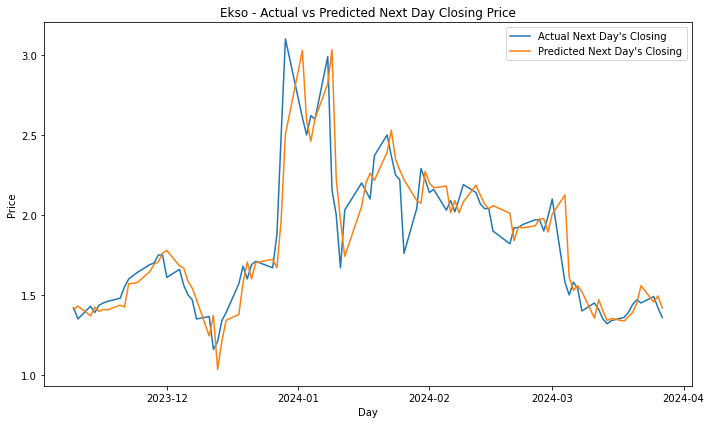

In [54]:
# Visualize results
# Create the Figure and Axes
fig, ax = plt.subplots(figsize=(10, 6))  # Specify the figure size

# Plot the Line
ax.plot(predicted_stock_data['next_day_close'], label="Actual Next Day's Closing")
ax.plot(predicted_stock_data['pred_next_day_close'], label="Predicted Next Day's Closing")
#ax.plot(raw_stock_data['volume'], label='Daily Volume')

# Customize the plot (optional)
ax.set_xlabel("Day")
ax.set_ylabel("Price")
ax.set_title("Ekso - Actual vs Predicted Next Day Closing Price")
ax.legend()

#Save the plot
plt.tight_layout()
plt.savefig("Ekso - Actual vs Predicted Next Day Closing Price", dpi=600, bbox_inches='tight', facecolor='white')

plt.show()

- This function below classifies the movement based on the difference between the close price and the predicted price, and returns the movement classification of either 'flat', 'uptrend', or 'downtrend').

In [55]:
def classify_movement(row, predicted_price_col):
  close_price = row['close']
  predicted_price = row[predicted_price_col]
  price_diff = abs(predicted_price - close_price)
  tolerance_level = close_price * tolerance

  if price_diff <= tolerance_level:
    return 'flat'
  elif predicted_price > close_price:
    return 'uptrend'
  else:
    return 'downtrend'

In [56]:
tolerance = 0.001 # 0.1% tolerance

# Apply the function with different predicted price columns
predicted_price_col = 'next_day_close'
predicted_stock_data['actual_movement'] = predicted_stock_data.apply(classify_movement, axis=1, args=(predicted_price_col,))

predicted_price_col = 'pred_next_day_close'
predicted_stock_data['pred_movement'] = predicted_stock_data.apply(classify_movement, axis=1, args=(predicted_price_col,))

predicted_stock_data.head()

,close,next_day_close,diff_nd_close,predictions,pred_next_day_close,actual_movement,pred_movement
Date,,,,,,,
2023-11-09 00:00:00-05:00,1.39,1.420,0.030,0.017781,1.407781,uptrend,uptrend
2023-11-10 00:00:00-05:00,1.42,1.350,-0.070,0.010825,1.430825,downtrend,uptrend
2023-11-13 00:00:00-05:00,1.35,1.430,0.080,0.019448,1.369448,uptrend,uptrend
2023-11-14 00:00:00-05:00,1.43,1.390,-0.040,-0.006131,1.423869,downtrend,downtrend
2023-11-15 00:00:00-05:00,1.39,1.436,0.046,0.006980,1.396980,uptrend,uptrend


In [57]:
# Calculate match percentage
match_count = (predicted_stock_data['actual_movement'] == predicted_stock_data['pred_movement']).sum()
total_count = len(predicted_stock_data)
match_percentage = (match_count / total_count) * 100

print("Percentage of matches between the ACTUAL trend and the PREDICTED trend:", match_percentage, "%")


Percentage of matches between the ACTUAL trend and the PREDICTED trend: 46.31578947368421 %


In [58]:
# ACTUAL TREND
# Count occurrences of each value in the 'actual_movement' column
value_counts = predicted_stock_data['actual_movement'].value_counts()

# Print the counts
print(value_counts)

uptrend      49
downtrend    42
flat          4
Name: actual_movement, dtype: int64


In [59]:
# PREDICTED TREND
# Count occurrences of each value in the 'pred_movement' column
value_counts = predicted_stock_data['pred_movement'].value_counts()

# Print the counts
print(value_counts)

uptrend      55
downtrend    30
flat         10
Name: pred_movement, dtype: int64


- These two steps above helps ensure that there is a true balance in the trend "classification".
- I ran several iterations of different tolerance levels, ending up with 0.1%, which produced the best results and balance between accuracy and realistic trend distribution.

### Analyzing Bias

""Residual Plots: Plot the residuals (prediction errors) against predicted values or input features. Systematic patterns in residuals can highlight bias.
Learning Curves: Plot model performance vs. the size of the training set. If performance plateaus early with increasing training data, it suggests high bias.""

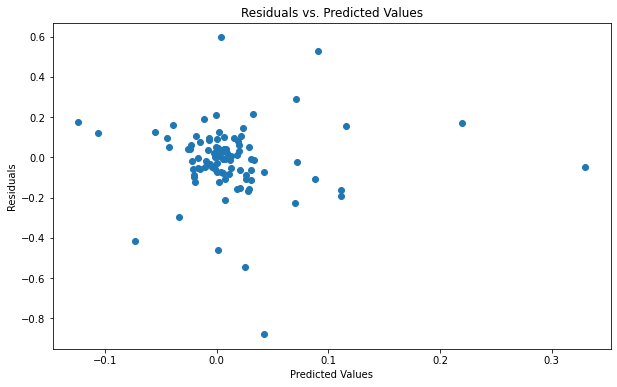

In [60]:
# Calculate residuals
#predictions
residuals = y_test - predictions 

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


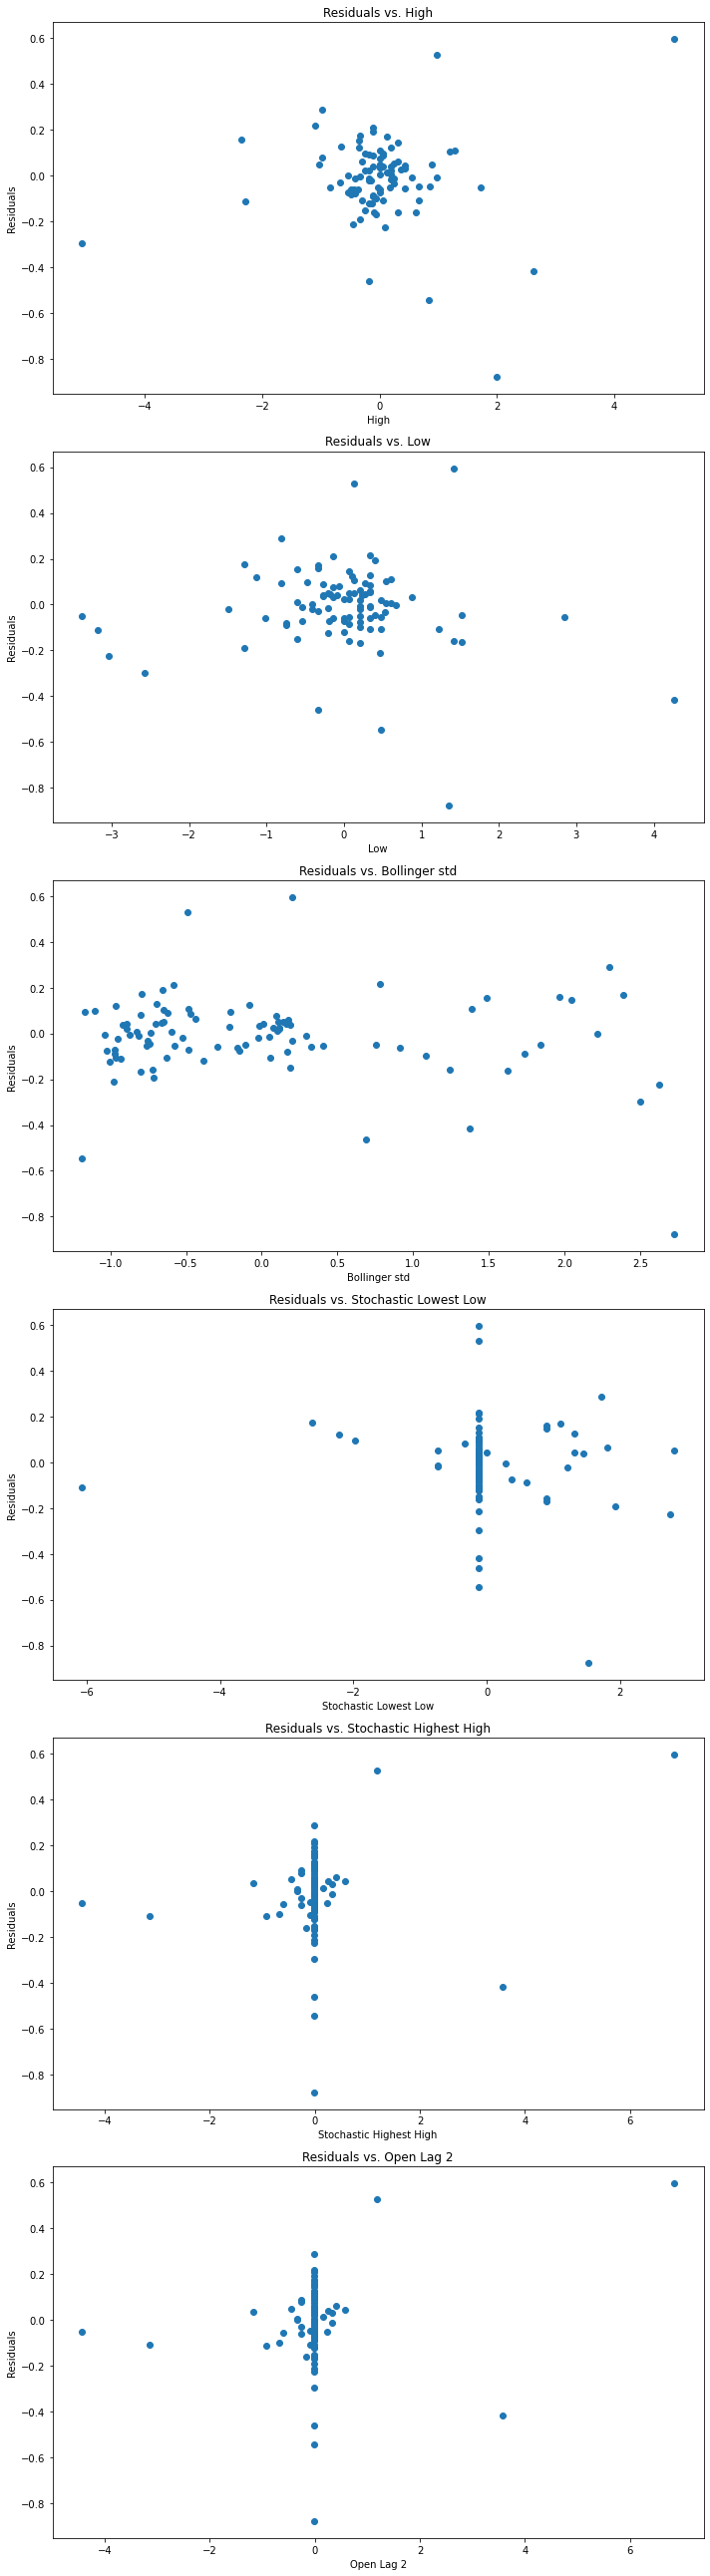

In [61]:
# Plot residuals vs each one of the features

# Create the Figure and Axes
fig = plt.figure(figsize=(10, 36))

# Plot the Line
ax1 = fig.add_subplot(6,1,1)
ax1.scatter(X_test_scaled[:, 0], residuals)
ax1.set_xlabel("High")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs. High")

ax2 = fig.add_subplot(6,1,2)
ax2.scatter(X_test_scaled[:, 1], residuals)
ax2.set_xlabel("Low")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals vs. Low")

ax3 = fig.add_subplot(6,1,3)
ax3.scatter(X_test_scaled[:, 2], residuals)
ax3.set_xlabel("Bollinger std")
ax3.set_ylabel("Residuals")
ax3.set_title("Residuals vs. Bollinger std")

ax4 = fig.add_subplot(6,1,4)
ax4.scatter(X_test_scaled[:, 3], residuals)
ax4.set_xlabel("Stochastic Lowest Low")
ax4.set_ylabel("Residuals")
ax4.set_title("Residuals vs. Stochastic Lowest Low")

ax5 = fig.add_subplot(6,1,5)
ax5.scatter(X_test_scaled[:, 4], residuals)
ax5.set_xlabel("Stochastic Highest High")
ax5.set_ylabel("Residuals")
ax5.set_title("Residuals vs. Stochastic Highest High")

ax6 = fig.add_subplot(6,1,6)
ax6.scatter(X_test_scaled[:, 4], residuals)
ax6.set_xlabel("Open Lag 2")
ax6.set_ylabel("Residuals")
ax6.set_title("Residuals vs. Open Lag 2")


#Save the plot
plt.tight_layout()
plt.savefig("Residuals vs Features", dpi=600, bbox_inches='tight', facecolor='white')

plt.show()

### Prepare functions for Flask and Heroku Deployment

***This is my working space to ensure that my deployed model is functioning as expected.***

Define a function that a user will input the opening price, the day's high and low prices and the closing price, and the model will output the predicted price. 

Special note: "In the US, the minimum tick size for most stocks was \\$0.01 dollars for a long time. However, with decimalization, the minimum tick size has been reduced to \\$0.0001 for certain stocks, especially those priced above \\$ 1.00." (Segal, 2024)

In [62]:
#Slighly diferent than the flask one , just added the closing price to the beginning

def prepDataAndPredict(high, low, bollinger_std, stochastic_lowest_low, stochastic_highest_high, open_lag_2):
    # keep all inputs in array
    data = np.array([high, low, bollinger_std, stochastic_lowest_low, stochastic_highest_high, open_lag_2])

    # Reshape array for the model (we used scaled values)
    data = data.reshape(1, -1)

    # Load the model and scaler
    with open('saved_model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
        loaded_scaler = pickle.load(f)

    # Preprocess new data
    scaled_data = loaded_scaler.transform(data)

    # predict
    pred_diff = loaded_model.predict(scaled_data)

    return round(pred_diff[0], 6)

Testing with the following values pulled from data not in the training or testing set:

- High Price:1.80

- Low Price:1.660

- Closing Price:1.67

- Bollinger Standard Deviation:0.299684

- Stochastic Oscillator, Lowest Low:1.66

- Stochastic Oscillator, Highest High:2.607

- Open Price, 2 Day Lag:2.0

In [70]:
pred_diff = prepDataAndPredict(1.80,1.660,0.299684,1.66,2.607,2.0)

C:\Users\onyab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
closing_price = 1.67
prediction = round(pred_diff + closing_price, 4)
price_diff = abs(prediction - closing_price)

tolerance = 0.001  # 0.1% 
tolerance_level = closing_price * tolerance
trend = ""

if price_diff <= tolerance_level:
    trend = 'Flat'
elif prediction > closing_price:
    trend = 'Uptrend'
else:
    trend = 'Downtrend'

In [72]:
prediction

1.6803